# A Complete Introduction and Walkthough - Second Try

## 1. About Competition
이 대회의 목적은 **가구의 빈곤 정도**를 에측하는 것이다. `Target`은 1-4로 가난의 정도를 나타내며, 1이 극단적 빈곤을 의미한다. 개인에 대한 피처와 가구에 대한 피처가 섞여있으며, 주최측의 설명을 보아 개인이 아닌 가구에 대해 예측을 해야한다. 그러므로 개인 데이터를 집계하여 가구 데이터로 변환하는 과정이 필요하다.

평가 지표로는 각 클래스별 F1스코어의 평균을 낸 **Macro F1스코어**를 사용한다. 다만 클래스 분포로 보아 클래스 불균형 문제가 있는데 이 상황에서 Macro F1스코어는 적절치 않은 지표로 보인다. 하지만 대회측의 평가 지표이므로 Macro F1스코어로 모델 성능을 측정한다.

## 2. Imports

In [2]:
# 데이터 조작
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기 위한 기본 세팅
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

# 데이터프레임 디스플레이시 최대 컬럼 수 지정
pd.options.display.max_columns = 150

## 2. Load Data

In [3]:
# 데이터 로드
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [4]:
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


학습 데이터는 143개의 피처와 9557개의 데이터를 갖고 있다. 그리고 143개의 피처는 다음과 같이 분류된다.
* **정수형(=카테고리형) 컬럼** : 130개
* **실수형(=연속적인 값) 컬럼** : 8개
* **문자열 컬럼 : 5개**

In [6]:
test.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     1     1     2     0     1     1     1     2     3       3       3   
1     1     1     2     0     1     1     1     2     3       3       3   
2     1     1     2     0     1     1     1     2     3       3       3   
3     0     1     1     0     0     0     0     1     1       1       1   
4     0     0     0     0     1     1     0     1     1       1       1   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0         0      NaN       3            1            0          0         0   
1        16      NaN       3            1            0          0         0   
2        17      NaN       3            1            0          0         0   
3        16      NaN       1            1            0          0         0   
4        11      NaN       1            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         0          0            0           0           1            0   
2         0          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          1               0   
1          0          0            0           0          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              0   
2           0           0           0              0              0   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              1              0          1          0          0          0   
2              1              0          1          0          0          0   
3              0              0          1          0

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


테스트 데이터는 `Target` 피처를 제외한 142개의 피처를 가지고 있으며 학습 데이터보다 훨씬 많은 23856개의 데이터를 갖고 있다. 

## 3. Explore Features

### 3.1. Integer Columns

Text(0.5, 1.0, 'count of unique values in integer columns')

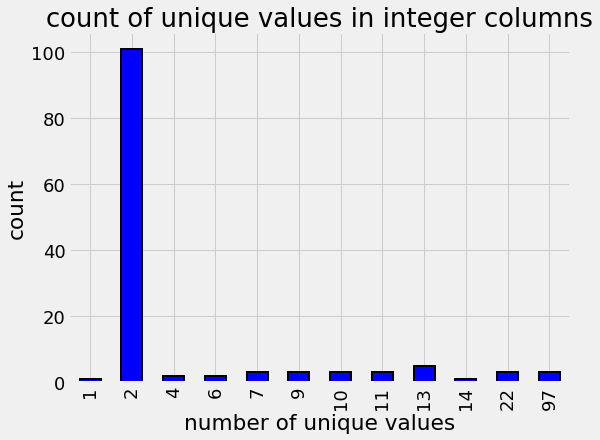

In [8]:
# 정수형 변수의 고유값 분포 - barplot
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(
    color='blue', figsize=(8, 6), edgecolor='k', linewidth=2)
plt.xlabel('number of unique values')
plt.ylabel('count')
plt.title('count of unique values in integer columns')

가장 많은 고유값이 2개인 컬럼은 **불리언 변수(Boolean)**를 나타낸다. 대부분의 경우 이 불리언 변수는 가구에 관한 변수이다.

### 3.2. Float Columns

In [9]:
from collections import OrderedDict

# 빈곤정도 색깔 매핑
colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

C:\Users\round\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\round\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\round\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


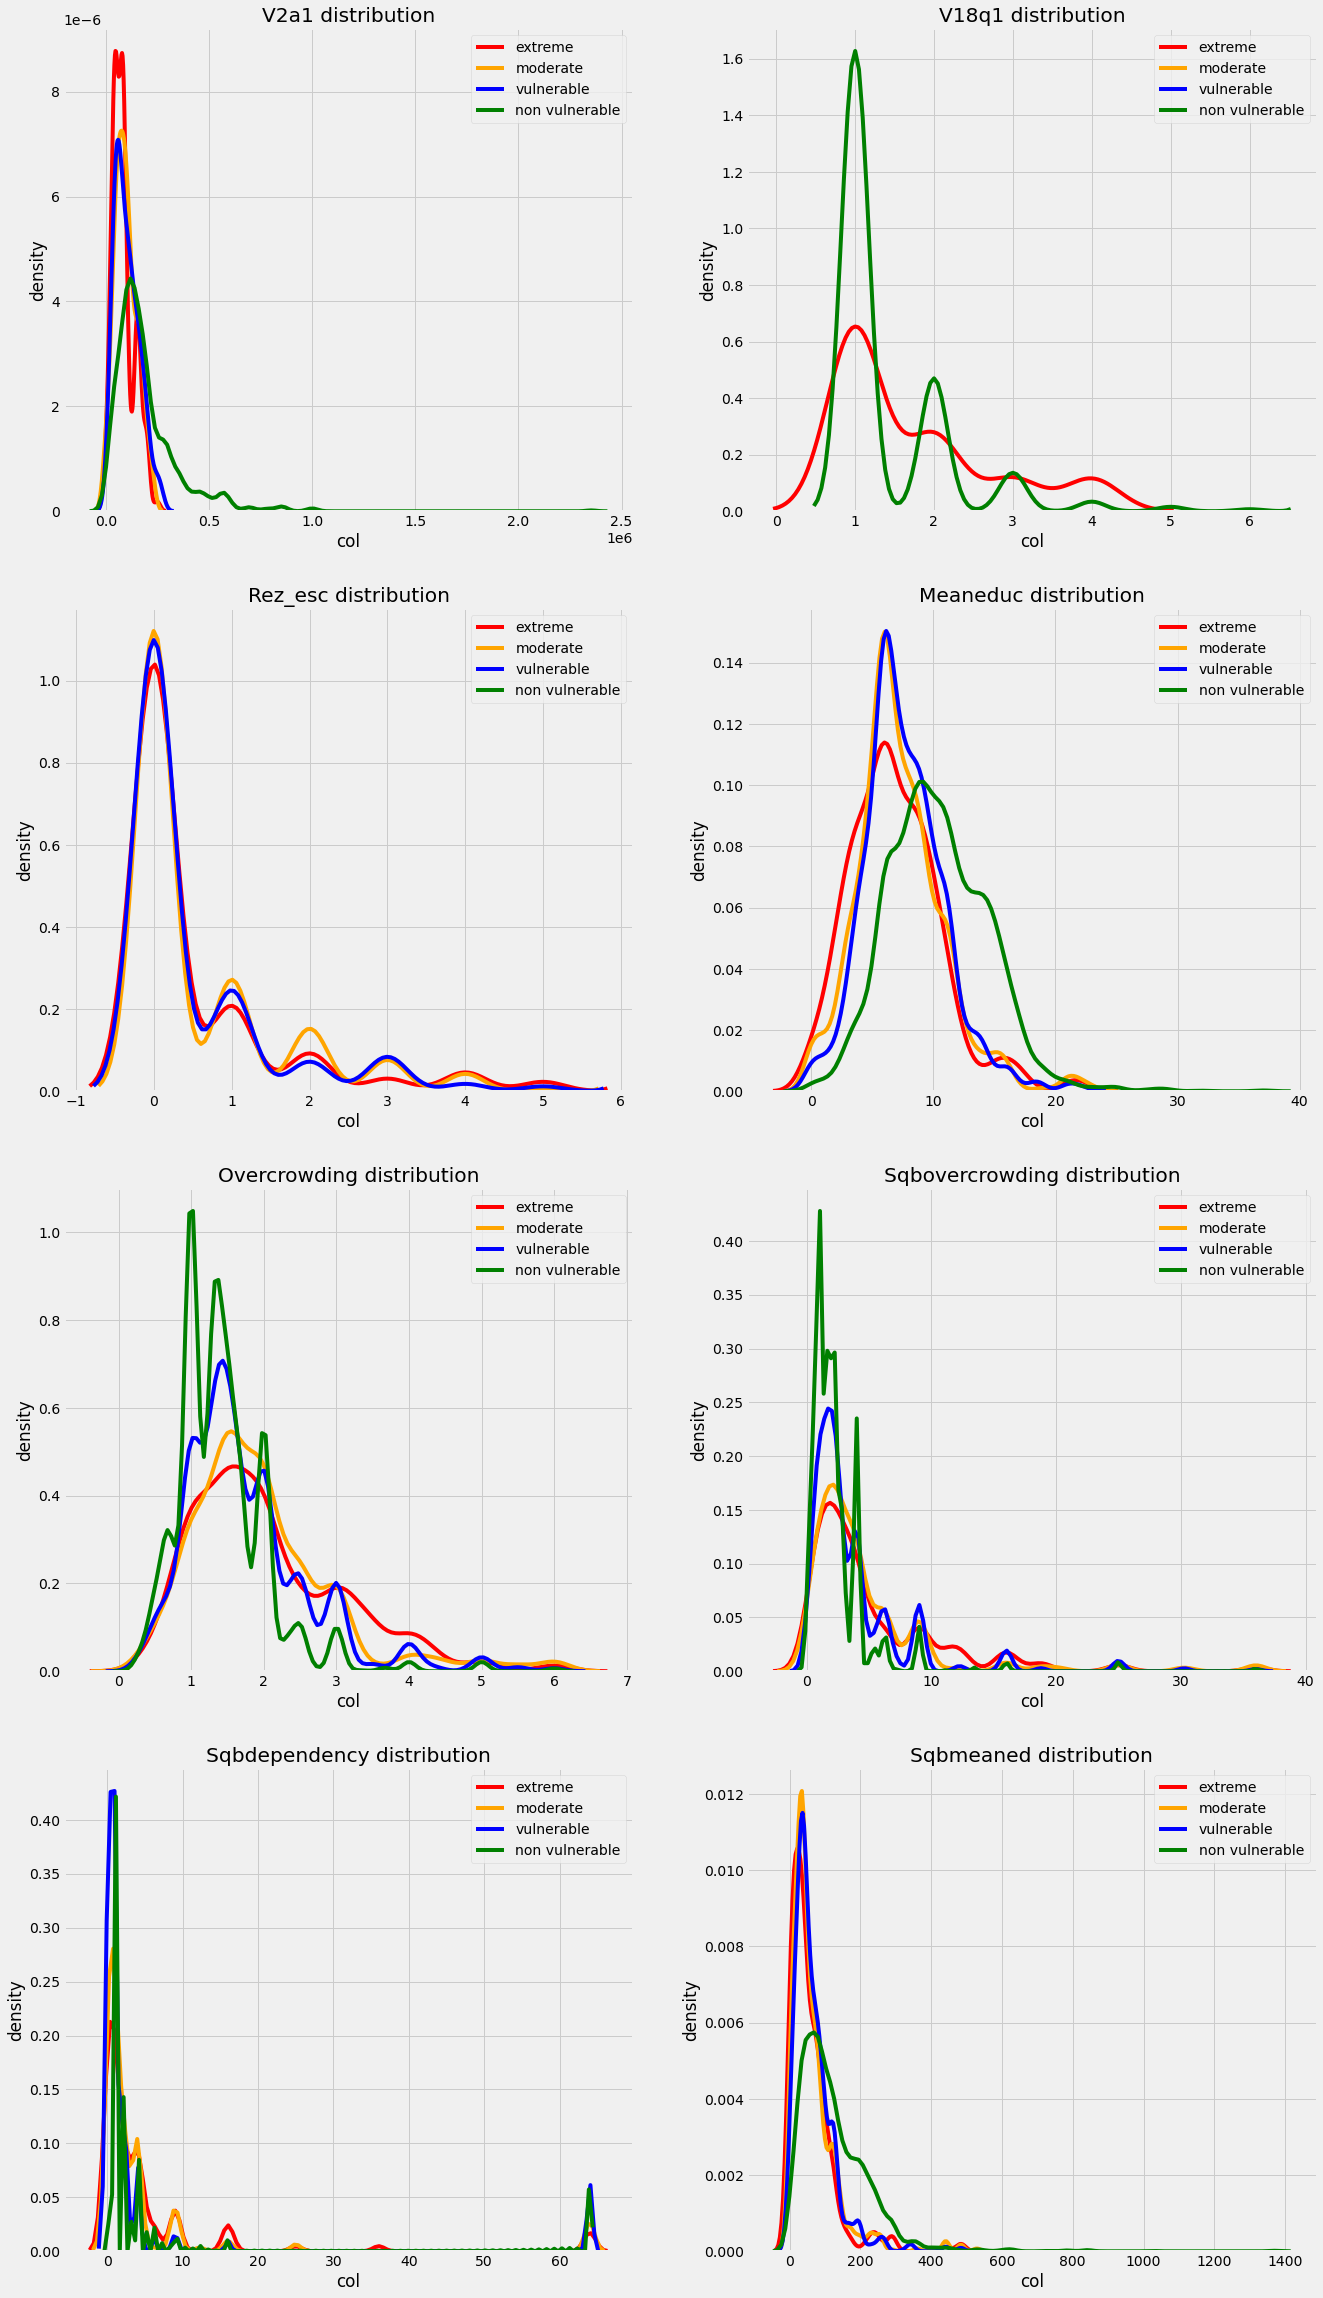

In [10]:
# seaborn의 버전차로 인해 노트북의 그래프 대로 나오지 않음
# 그래서 실행하지는 않고 아래 결과 사진을 첨부함
plt.figure(figsize=(20, 16))
plt.style.use('fivethirtyeight')


for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    
    # 각 빈곤 정도별 실수형 변수의 분포 - kdeplot
    for poverty_level, color in colors.items():(
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                   ax=ax, color=color, label=poverty_mapping[poverty_level]))
    plt.title(f'{col.capitalize()} distribution')
    plt.xlabel(f'col')
    plt.ylabel('density')
    
# subplot의 위쪽 간격 조절
plt.subplots_adjust(top=2)

![real-result](../img/float-dist-plot.png)

실수형 컬럼은 연속적인 **변수(Continuous)**를 나타낸다. 위의 그래프로 보아 `meanedu`의 경우 타켓 값별 분포 차이를 보여주고 있으므로 타켓과 관련이 이쓴 것으로 보인다. 

자세한 내용은 뒤쪽에서 다시 설명할 예정!

### 3.3. Object Columns

In [11]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

* `Id`/`idhogar` : 개인/가구를 식별하기 위한 식별자
* `dependency` : 부양 정도 = (19세 이하, 64세 이상의 가구원 수)/(19세-64세의 가구원 수)
* `edjefe`/`edjefa`  : 남성/여성 가장의 교육 년수

이 중 `dependency`와 `edjefe`, `edjefa`는 문자열과 숫자가 섞여있는 것을 볼 수 있다. 이 변수들의 경우 yes는 0, no는 1로 변환해줘 모델에 넣을 수 있도록 만들어준다.

In [12]:
mapping = {'yes':1, 'no':0}

# 문자열 yes와 no를 1과 0으로 변환
for df in [train, test]:
    df['dependency']=df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

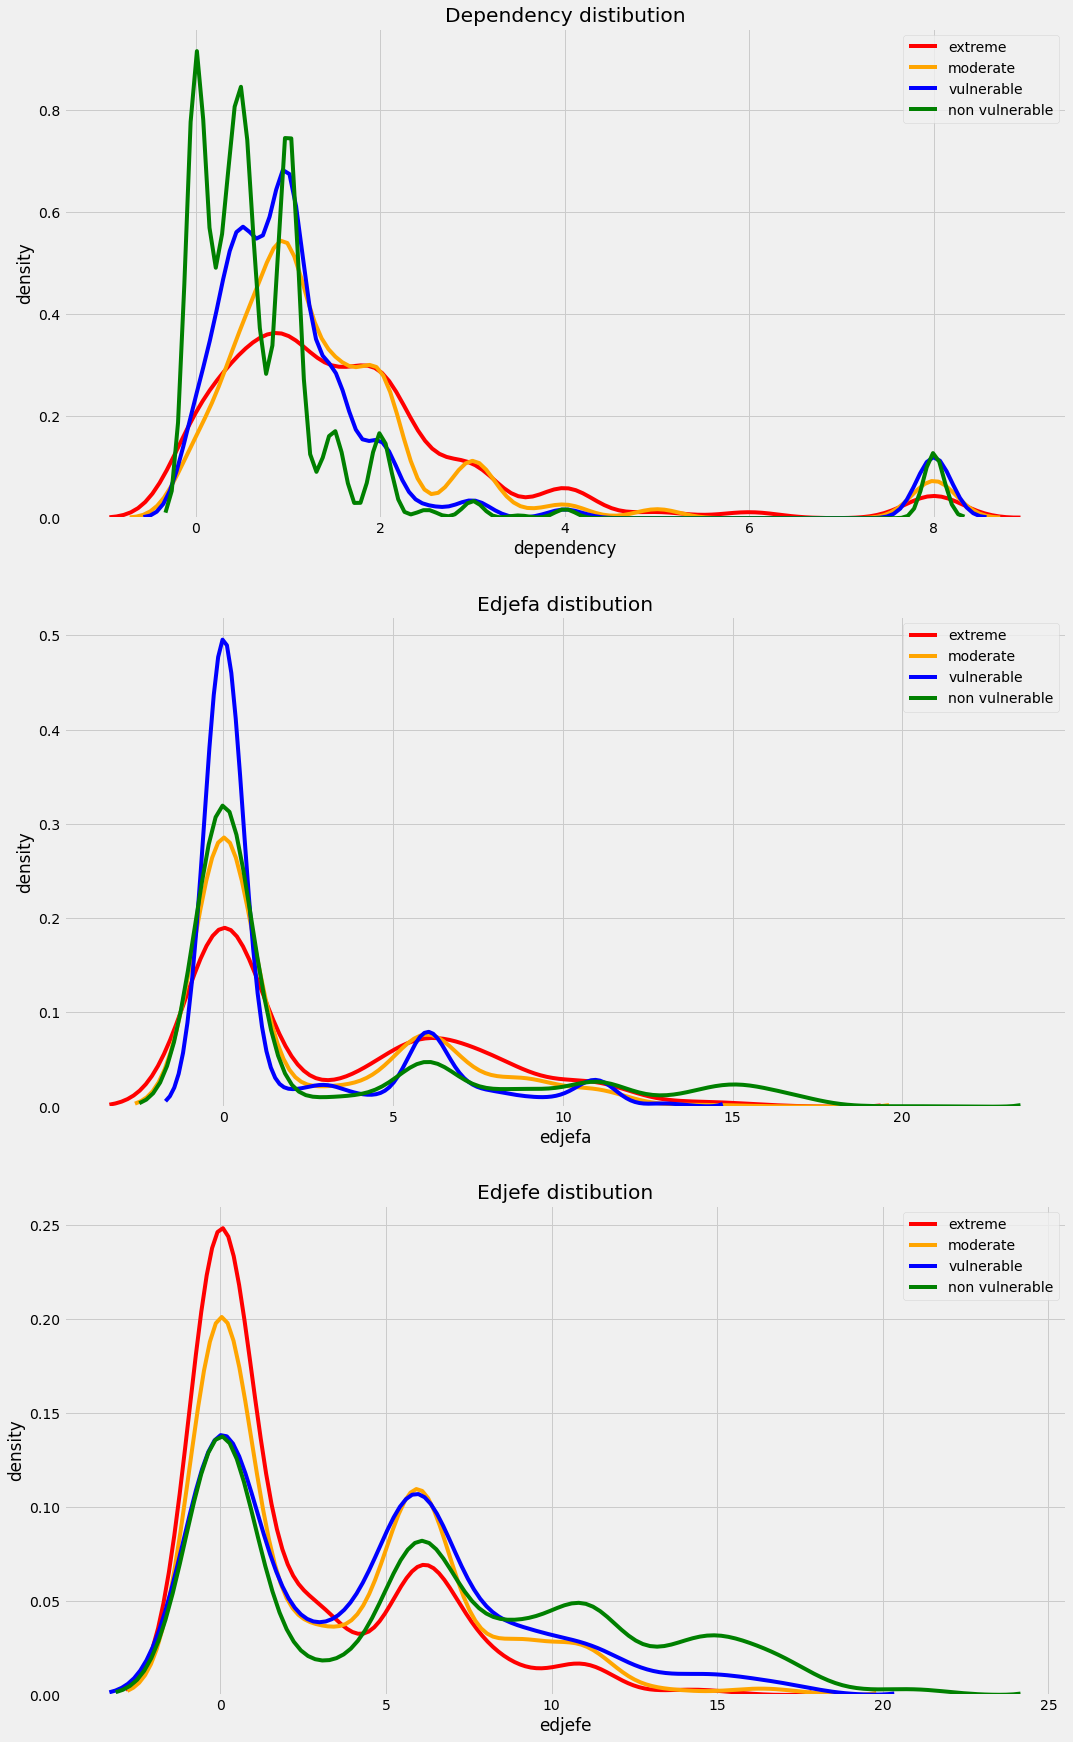

In [13]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    
    # 빈곤정도별 값 분포 - kdeplot
    for poverty_level, color in colors.items():
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(
        ), ax=ax, color=color, label=poverty_mapping[poverty_level])

    plt.title(f'{col.capitalize()} distibution')
    plt.xlabel(f'{col}')
    plt.ylabel('density')

# subplot의 위쪽 간격 조절
plt.subplots_adjust(top=2)

## 4. Merge Train and Test Dataset
위의 전처리 과정을 조금 더 쉽게하기 위해 학습데이터와 테스트데이터를 병합할 수 있다. 왜냐하면 학습데이터에 한 작업을 동일하게 테스트데이터에도 적용을 해줘야 하기 때문이다.

다만 테스트데이터에는 `Target`이 없으므로 임의로 생성하여 `np.nan` 값으로 채워주자.

In [14]:
test['Target'] = np.nan
data = train.append(test, ignore_index=True)

data.tail()

Id  v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
33408  ID_a065a7cad   NaN       1      2       1     1       1     0    NaN   
33409  ID_1a7c6953b   NaN       0      3       0     1       1     0    NaN   
33410  ID_07dbb4be2   NaN       0      3       0     1       1     0    NaN   
33411  ID_34d2ed046   NaN       0      3       0     1       1     0    NaN   
33412  ID_34754556f   NaN       0      3       0     1       1     0    NaN   

       r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
33408     0     2     2     1     3     4     1     5     6       6       6   
33409     0     1     1     0     3     3     0     4     4       4       4   
33410     0     1     1     0     3     3     0     4     4       4       4   
33411     0     1     1     0     3     3     0     4     4       4       4   
33412     0     1     1     0     3     3     0     4     4       4       4   

       escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  \
33408         3      0.0       6            0            0          0   
33409         6      NaN       4            0            0          1   
33410         4      1.0       4            0            0          1   
33411         5      0.0       4            0            0          1   
33412         6      NaN       4            0            0          1   

       pareddes  paredmad  paredzinc  paredfibras  paredother  pisomoscer  \
33408         0         1          0            0           0           0   
33409         0         0          0            0           0           0   
33410         0         0          0            0           0           0   
33411         0         0          0            0           0           0   
33412         0         0          0            0           0           0   

       pisocemento  pisoother  pisonatur  pisonotiene  pisomadera  techozinc  \
33408            1          0          0            0           0          1   
33409            1          0          0            0           0          1   
33410            1          0          0            0           0          1   
33411            1          0          0            0           0          1   
33412            1          0          0            0           0          1   

       techoentrepiso  techocane  techootro  cielorazo  abastaguadentro  \
33408               0          0          0          0                1   
33409               0          0          0          0                1   
33410               0          0          0          0                1   
33411               0          0          0          0                1   
33412               0          0          0          0                1   

       abastaguafuera  abastaguano  public  planpri  noelec  coopele  \
33408               0            0       0        0       0        1   
33409               0            0       0        0       0        1   
33410               0            0       0        0       0        1   
33411               0            0       0        0       0        1   
33412               0            0       0        0       0        1   

       sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
33408           0           0           1           0           0   
33409           0           0           1           0           0   
33410           0           0           1           0           0   
33411           0           0           1           0           0   
33412           0           0           1           0           0   

       energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
33408              0              1              0              0          0   
33409              0              0              1              0          0   
33410              0              0              1              0          0   
33411              0              0              1              0

## 5. About Label
### 5.1. Explore Label Distribution
앞서 이야기했던 것처럼 이 데이터셋의 라벨의 분포는 불균형(imbalanced)하다. 정확한 라벨 분포를 보기 위해 `parentesco1==1`인 데이터만 추출하여 개인이 아닌 **가구의 라벨 분포**를 살펴보자.

In [15]:
# 가장 데이터 추출
heads = data.loc[data['parentesco1'] == 1].copy()
heads.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
5  ID_ec05b1a7b  180000.0       0      5       0     1       1     1    1.0   
8  ID_1284f8aad  130000.0       1      2       0     1       1     0    NaN   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
5     0     2     2     1     1     2     1     3     4       4       4   
8     0     1     1     2     1     3     2     2     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
5        11      NaN       4            1            0          0         0   
8         9      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
5         0          0            0           0           1            0   
8         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
5          0          0            0           0          1               0   
8          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
5          0          0          1                1               0   
8          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
5            0       1        0       0        0           0           1   
8            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
5           0           0           0              0              1   
8           0           0           0              0              0   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
5              0              0          1          0

In [16]:
# 병합된 데이터에서 학습데이터 라벨 추출
train_labels = data.loc[(data['Target'].notnull()) & (
    data['parentesco1'] == 1), ['Target', 'idhogar']]
train_labels.head()

Target    idhogar
0     4.0  21eb7fcc1
1     4.0  0e5d7a658
2     4.0  2c7317ea8
5     4.0  2b58d945f
8     4.0  d6dae86b7

In [17]:
# 타겟 값별 카운팅
label_counts = train_labels['Target'].value_counts().sort_index()
label_counts

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

Text(0.5, 1.0, 'poverty level breakdown')

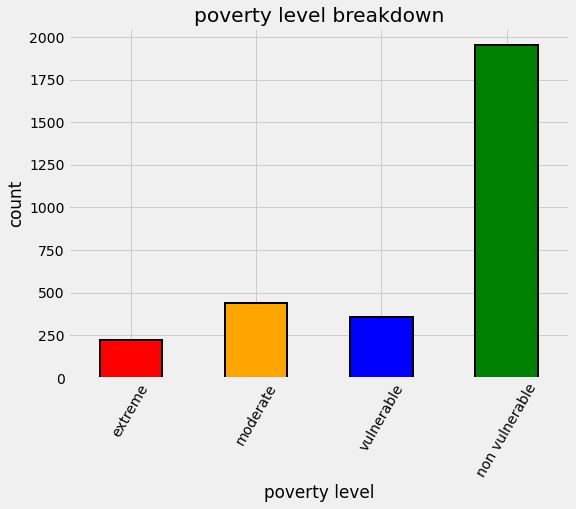

In [18]:
# 각 라벨  별 데이터 개수 - barplot
label_counts.plot.bar(figsize=(8, 6), color=colors.values(),
                     edgecolor='k', linewidth=2)
plt.xlabel('poverty level')
plt.ylabel('count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
          list(poverty_mapping.values()), rotation=60)
plt.title('poverty level breakdown')

예상했다 싶이 **대부분의 라벨이 Non-Vulnerable에 쏠려 있는 것**을 볼 수 있다. 이런 경우 그 외의 라벨을 가진 데이터가 훨씬 적기 때문에 모델이 해당  라벨을 예측하는 데 어려움을 겪을 수 있다. 이 경우 개수가 적은 라벨들을 오버샘플링하여 균형을 맞추는 방법이 있다.

### 5.2. Address Wrong Labels
여느 데이터와 마찬가지로 이 데이터셋도 오류(error)를 가지고 있다. 이러한 오류가 발생하는 이유는 측정하는 사람의 입력 오류, 측정 오류 또는 맞지만 극단적인 수치인 경우 등 다양하다.

정확한 원인은 알 수 없으나 오류가 있기 때문에 **가장을 중심으로** 봐야하는 이유가 될 것이다.

#### 5.2.1. Identify Errors
에러를 고치기 전에 에러를 확인할 필요가 있다. 다음과 같은 과정을 통해 **한 가구의 모든 구성원이 같은 라벨을 갖고 있는지** 확인해보자.

In [19]:
# 가구로 그룹화한 뒤 고유값이 1개인지 확인
# 모든 구성원이 같은 라벨을 갖는지 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [20]:
# False(같은 라벨이 아닌 경우) 추출
not_equal = all_equal[all_equal != True]
print('같은 라벨값을 갖지 않는 가구의 수 :', len(not_equal))

같은 라벨값을 갖지 않는 가구의 수 : 85


In [21]:
# [예시]같 은 라벨 값을 갖지 않는 첫 번째 가구 추출
train[train['idhogar'] == not_equal.index[0]
      ][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

이처럼 가구의 모든 구성원이 같은 라벨을 갖지 않는 가구는 총 85가구임을 볼 수 있다. 위에는 그에 해당하는 첫 번째 가구의 데이터프레임인데 이럴 경우 **가장의 라벨을 가구의 라벨로** 취급한다. 위의 경우는 `parentesco1==1`인 데이터의 타겟 값인 **3**이 해당 가구의 라벨이 된다.

#### 5.2.2. Families without Heads of Household
**그럼 가장이 없는 가구의 경우는 어떻게 할까?** 우선 가장이 없는 가구가 몇 가구인지 살펴보자.

In [22]:
# 각 가구의 parentesco1 데이터 추출
households_leader = train.groupby('idhogar')['parentesco1'].sum()
households_leader

idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
            ..
ff9343a35    1
ff9d5ab17    1
ffae4a097    1
ffe90d46f    1
fff7d6be1    1
Name: parentesco1, Length: 2988, dtype: int64

In [23]:
# 가장이 없는 가구 추출
households_no_head = train.loc[train['idhogar'].isin(
    households_leader[households_leader == 0].index), :]
print('가장이 없는 가구 수 :', households_no_head['idhogar'].nunique())

가장이 없는 가구 수 : 15


In [24]:
# 가장이 없는 가구의 라벨이 다른지 확인
households_no_head_equal = households_no_head.groupby(
    'idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('가장이 없는 가구 중 서로 다른 라벨을 가진 가구 수 :',
      sum(households_no_head_equal == False))

가장이 없는 가구 중 서로 다른 라벨을 가진 가구 수 : 0


다행히 가장이 없는 가구에서 서로 다른 라벨을 가진 가구는 없다. 대회 측에 따르면 **어떤 가구의 가장이 없는 경우 실제 라벨값이 무엇인지 알 수 없다**고 한다. 그러므로 우리는 가장이 없는 데이터의 경우 학습 시 사용하지 않을 것이다.

#### 5.2.3. Correct Errors
가장이 있는 가구의 라벨이 서로 다른 경우 가장의 라벨로 통일시켜주자.

In [25]:
for household in not_equal.index:
    # 가장의 라벨값  추출
    true_target = int(train[(train['idhogar'] == household) & (
        train['parentesco1'] == 1.0)]['Target'])
    # 해당 가정의 모든 구성원이 같은 라벨 값을 갖도록 통일
    train.loc[train['idhogar']==household, 'Target'] = true_target

In [26]:
# 가구를 기준으로 그룹화하여 라벨값이 모두 같은지 확인
all_equal = train.groupby('idhogar')['Target'].apply(lambda x:x.nunique()==1)
all_equal

idhogar
001ff74ca    True
003123ec2    True
004616164    True
004983866    True
005905417    True
             ... 
ff9343a35    True
ff9d5ab17    True
ffae4a097    True
ffe90d46f    True
fff7d6be1    True
Name: Target, Length: 2988, dtype: bool

In [27]:
# 같은 타켓 값을 갖지 않는 가구수
not_equal = all_equal[all_equal != True]
print('구성원 모두가 같은 타켓 값을 갖지 않는 가구수 :', len(not_equal))

구성원 모두가 같은 타켓 값을 갖지 않는 가구수 : 0


## 6. Missing Values
결측치를 채우기 전 각 컬럼별 결측치의 비율을 살펴보자.

In [28]:
# 각 컬럼의 결측치 개수
missing = pd.DataFrame(data.isnull().sum()).rename(columns={0:'total'})
missing

total
Id                   0
v2a1             24263
hacdor               0
rooms                0
hacapo               0
...                ...
SQBovercrowding      0
SQBdependency        0
SQBmeaned           36
agesq                0
Target           23856

[143 rows x 1 columns]

In [29]:
# 결측치 비율 컬럼 생성
missing['percent'] = missing['total'] / len(data)
missing

total   percent
Id                   0  0.000000
v2a1             24263  0.726154
hacdor               0  0.000000
rooms                0  0.000000
hacapo               0  0.000000
...                ...       ...
SQBovercrowding      0  0.000000
SQBdependency        0  0.000000
SQBmeaned           36  0.001077
agesq                0  0.000000
Target           23856  0.713974

[143 rows x 2 columns]

In [30]:
# 비율을 기준으로 역정렬
missing.sort_values('percent', ascending=False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

이 중 결측치 비율의 상위권을 차지한 `v18q1`, `rez_esc`, `v2a1`에 대해 살펴보자.

### 6.1. Plot Value Counts
각 컬럼별 값의 개수를 그래프로 그리기 위한 간단한 함수를 정의하였다.

In [31]:
# 컬럼의 값 별 개수를 계산
# 분포를 barplot으로 나타냄
def plot_value_counts(df, col, heads_only=False):
    # heads_only라면 가장만 추출함
    if heads_only:
        df = df.loc[df['parentesco1']==1].copy()
    
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot.bar(color='blue',
                                                edgecolor='k',
                                                linewidth=2)
    
    plt.xlabel(f'{col}')
    plt.title(f'{col} value counts')
    plt.ylabel('count')
    
    plt.show()

#### 6.1.1. v18q1
`v18q1`은 **가정이 소유하고 있는 태블릿 개수**를 나타낸다. 

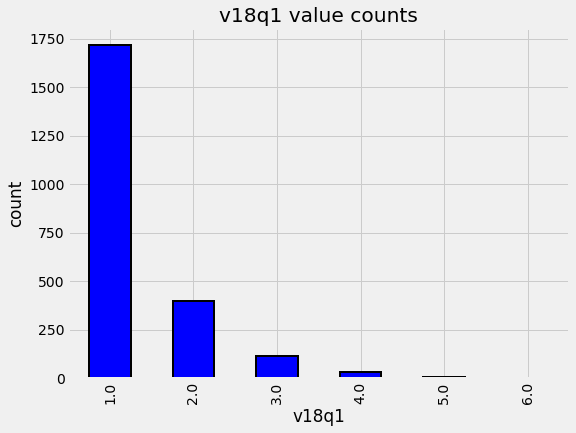

In [32]:
plot_value_counts(heads, 'v18q1')

대부분의 가구는 태블릿을 **1개**를 가지고 있는 것으로 보인다. 다만 결측치를 생각해본다면 이 값은 *태블릿을 갖고 있지 않는 경우*일 수도 있다. 

**한 가구가 테블릿을 소유하는지 여부**를 나타내는 `v18q`를 이용하여 결측치가 테블릿을 갖고 있지 않은 경우인지 확인해보자.

In [33]:
# v18q1이 NaN인 가구의 v18q가 0인지 확인
heads.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    8044
1       0
Name: v18q1, dtype: int64

`v18q`가 0일 때 `v18q1`의 결측치가 모두 몰려 있는 것으로 보아 **v18q1의 결측치는 태블릿을 가지고 있지 않는 경우**라 볼 수 있다. 그러므로 해당 결측치를 **0**으로 채워주자.

In [34]:
data['v18q1'] = data['v18q1'].fillna(0)

#### 6.1.2. v2a1
`v2a1`은 **월세 납부액(=임대료)**을 말한다. 다른 컬럼으로 `tipovivi_`가 있는 데 **주택의 소유/임대 현황**을 나타낸다. 이를 이용하여 `v2a1`의 결측치의 주택 소유/임대 현황을 살펴보자.

참고로 `tipovivi_`의 의미는 다음과 같다:
* `tipovivi1` : 완전한 개인 소유
* `tipovivi2` : 개인 소유지만 대출有
* `tipovivi3` : 임대로 소유
* `tipovivi4` : 담보로 잡혀 있음
* `tipovivi5` : 기타 (대여, 할당)

In [35]:
# 주택 소유/임대 여부를 나타내는 피처
own_variables = [x for x in data if x.startswith('tipo')]
own_variables

['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']

In [36]:
# v2a1의 결측치의 주택 소유/임대의 분포
v2a1_missing_dist = data.loc[data['v2a1'].isnull(), own_variables].sum()
v2a1_missing_dist

tipovivi1    20844
tipovivi2        0
tipovivi3        0
tipovivi4      597
tipovivi5     2822
dtype: int64

Text(0.5, 1.0, 'home ownership status for households missing rent payment')

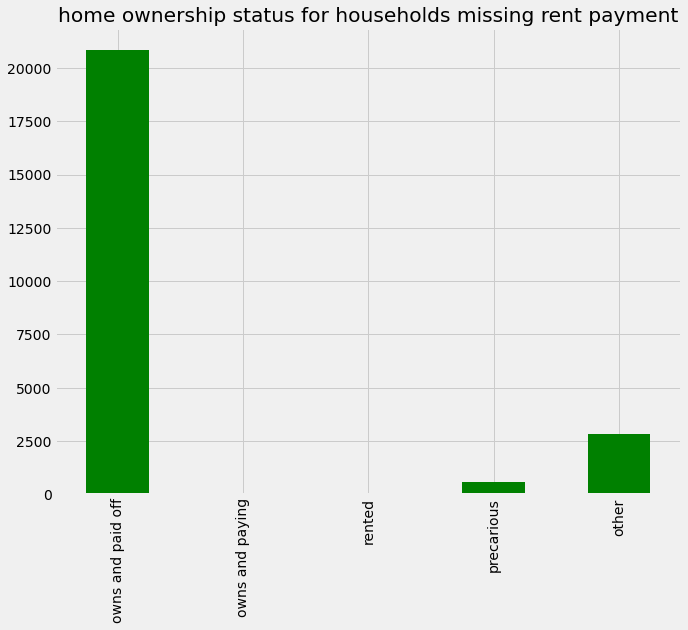

In [37]:
# 분포를 시각화 - barplot
v2a1_missing_dist.plot.bar(figsize=(10, 8), color='green',
                            ecolor='k', linewidth=2)
plt.xticks([0, 1, 2, 3, 4],
           ['owns and paid off', 'owns and paying', 'rented', 'precarious', 'other'])
plt.title('home ownership status for households missing rent payment')

`v2a1`의 결측치의 대부분이 **월세를 내지 않는, 개인 소유의 집을 갖고 있는 가구인 것**을 볼 수 있다. 그 외의 경우는 이유를 알 수 없다. 

개인 집을 소유하는 경우 `v2a1`의 결측치는 이므로 결측치를 **0**으로 채워주자. 그 외의 가구의 경우 후에 Imputation을 통해 채워지지만 결측치를 가진 가정임을 표시하기 위해 flag 컬럼을 추가해주자.

In [38]:
# 집을 소유하고 있는 가정의 v2a1을 0으로 채움
data.loc[(data['tipovivi1']==1), 'v2a1'] = 0
data.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    0.0   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       0.0       0      8       0     1       1     0    0.0   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [39]:
# v2a1 누락 여부를 나타내는 컬럼 생성
data['v2a1-missing'] = data['v2a1'].isnull()
data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

#### 6.1.3. rez_esc
`rez_esc`는 **지금 다니는 학교에서 몇 년이 지났는지**를 나타낸다. null값을 가진 가정의 경우 현재 학교를 다니는 자녀가 없을 가능성이 있다.

In [40]:
data['rez_esc'].value_counts()

0.0     4474
1.0      728
2.0      336
3.0      174
4.0       80
5.0       39
99.0       1
Name: rez_esc, dtype: int64

이를 확인하기 위해 결측치를 가진 데이터의 나이와 갖지 않은 데이터의 나이를 비교해보자.

In [41]:
# 결측치가 아닌 데이터의 나이 분포
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

결측치를 가지지 않은 개인의 나이의 **최대값은 17**임을 볼 수 있다. 참고로 코스타 리카의 교육제도는 *초등학교 6년*,  *중고등학교 5, 6년*으로 이루어져 있다.

이제 `rez_esc`의 결측치를 가진 개인의 나이 분포를 살펴보자.

In [42]:
# 결측치를 가진 개인 나이 분포
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

이 대회의 토론장(discussion)을 살펴보았다면 `rez_esc`는 **오직 7살 이상 19살 이하의 개인**에게만 정의되어 있음을 알 수 있다. 그러므로 19살 초과, 7살 이하의 개인의 데이터의 경우 모두 **0**으로 결측치를 채워주면 된다.

그 외에 7살 이상, 19살 이하이고 `rez_esc`가 결측치인 데이터는 Imputation 단계에서 채워두게 하고 결측치를 나타내는 flag 컬럼을 추가하자.

In [43]:
# 19살 초과, 7살 미만이고 rez_esc가 결측치인 경우
# 모두 0으로 채움
data.loc[((data['age'] > 19) | (data['age'] < 7)) &
         (data['rez_esc'].isnull()), 'rez_esc'] = 0

In [44]:
# 결측치를 가진 7살과 19살 사이의 결측치를 가진 데이터인 경우
# 결측치를 표시하는 flag 컬럼 추가
data['rez_esc-missing'] = data['rez_esc'].isnull()

앞서 `describe()`를 통해 `rez_esc`에 99인 이상치 1개를 볼 수 있다. 또한 해당 분포를 보았을 때 최대값은 5임을 알 수 있다. 그러므로 5가 넘는 값들을 모두 5로 변경해준다.

In [45]:
data.loc[data['rez_esc']>5, 'rez_esc'] = 5
data['rez_esc'].value_counts()

0.0    30894
1.0      728
2.0      336
3.0      174
4.0       80
5.0       40
Name: rez_esc, dtype: int64

### 6.2. Plot Two Categorical Variables
두 개의 카테고리형 변수들을 시각화하는 방법은 scatterplot, boxplot 등 다양하지만 저자는 이 방법에 만족하지 않아 다음과 같은 함수를 정의하였다. 

이 함수는 기본적으로 두 카테고리형 변수의 scatterplot으로 각 카테고리의 점의 크기가 **x를 고정값으로 둘 때 각 y값의 비율**을 나타낸다.

In [46]:
# 두 개의 카테고리형 변수를 시각화 - scatterplot
def plot_categoricals(x, y, data, annotate=True):
    # 정규화 하기 전의 카운트 데이터
    # 1. y를 기준으로 그룹화
    # 2. 그 때의 x의 값에 따른 개수 카운팅
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=False))
    raw_counts = raw_counts.rename(columns={x: 'raw_count'})
    
    # 정규화한 후의 카운트 데이터
    # x와 y의 각 그룸별 개수 카운팅
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize=True))
    
    # 컬럼 명을 바꾸고 인덱스 순서 리셋
    counts = counts.rename(columns={x:'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # 정규화전 데이터인 raw_count 추가
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize=(14, 10))
    
    # 퍼센트를 기준으로 각 그룹별 분포 - scatterplot
    plt.scatter(counts[x], counts[y], edgecolor='k', color='lightgreen',
               s=100*np.sqrt(counts['raw_count']), marker='o',
               alpha=0.6, linewidth=1.5)
    
    if annotate:
        # 그림(plot)에 주석달기
        for i, row in counts.iterrows():
            # 적절한 오프셋(offset) 텍스트 삽입
            plt.annotate(xy=(row[x] - (1/counts[x].nunique()),
                            row[y] - (0.15/counts[y].nunique())),
                        color='navy',
                        s=f"{round(row['percent'], 1)}%")
    
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # 최소 최대값을 제곱근으로 변환
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 범례를 5가지로 구분
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # 범례의 마커(marker)
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # 범례 및 포맷팅
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # 축 한계 조정
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    
    plt.grid(True)
    plt.xlabel(f"{x}")
    plt.ylabel(f"{y}")
    plt.title(f"{y} vs {x}")

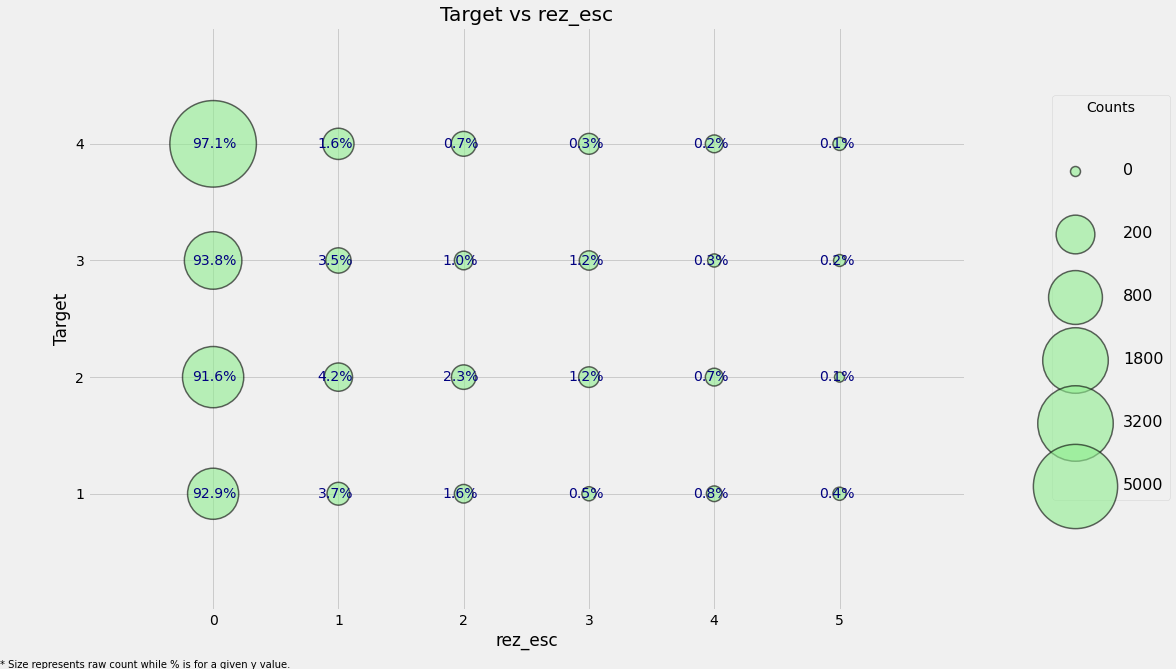

In [47]:
# rez_esc와 Target의 분포
plot_categoricals('rez_esc', 'Target', data)

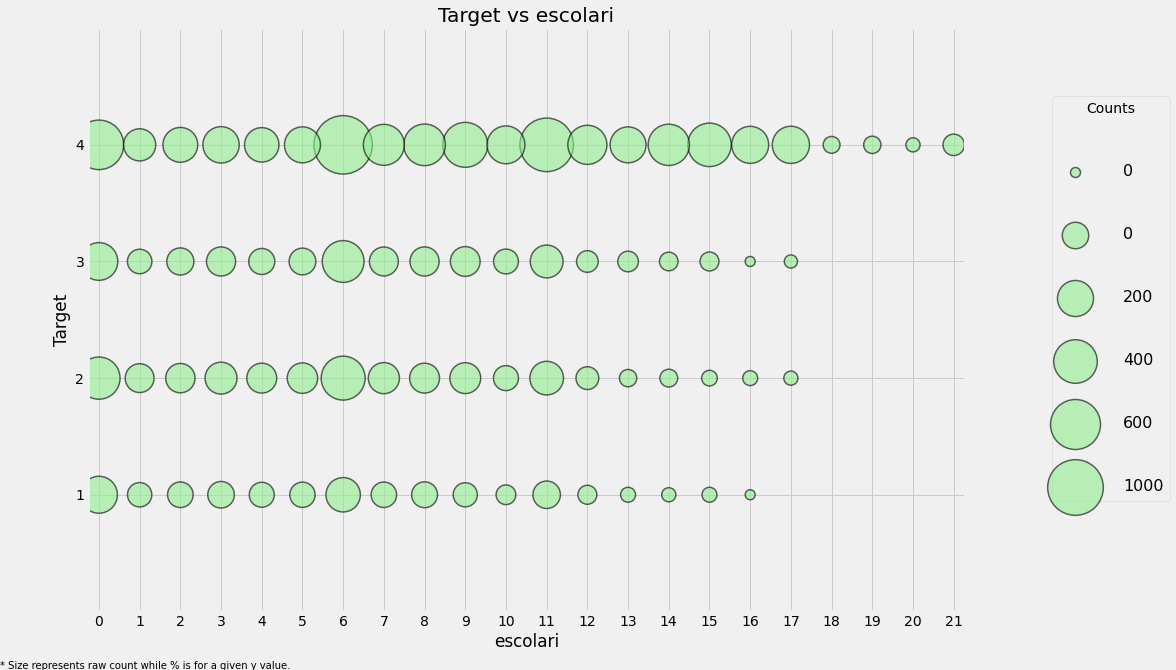

In [48]:
# escolari와 Target의 분포
plot_categoricals('escolari', 'Target', data, annotate=False)

### 6.3. Label Distribution of Missing Values
마지막으로 손실값들의 타켓 라벨의 분포를 살펴보자.

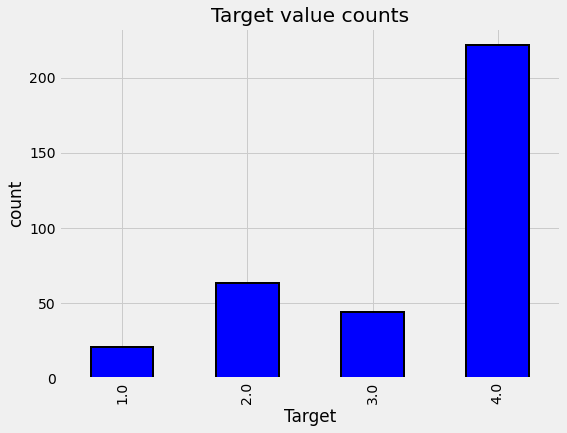

In [49]:
# rez_esc의 결측치
plot_value_counts(data[(data['rez_esc-missing']==1)], 'Target')

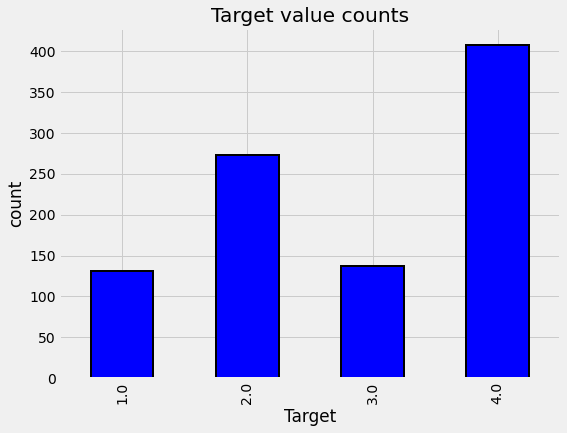

In [50]:
# v2a1의 결측치
plot_value_counts(data[data['v2a1-missing']==1], 'Target')

Non Vulnerable을 제외한 나머지의 분포를 보았을 때 결측치에서 `2`의 비율이 다소 높은 것을 볼 수 있다. 이를 감안했을 때 위의 지표들은 유용한 지표로 사용될 수 있을 것 같다.

가끔은 결측치가 중요한 정보를 가지고 있다는 것을 명심하자.

## 7. Feature Engineering
학습을 위해서 여러 개인을 한 가구로 통합시킬 필요가 있다. 이를 위해 개인을 가구  별로 그룹화하여 개별 값을 병합해보자.

### 7.1. Column Definitions
우선 각각의 컬럼의 정의와 해당 컬럼이 **개인 수준 혹은 가구 수준의 데이터인지**를 Documentation을 통해 알아보자. 그 후 가구 수준에서 각 변수의 특징을 반영하여 병합을 하면 된다.

1. 변수를 개인 수준과 가구 수준으로 구분한다.
2. 개인 수준의 데이터를 적절히 병합할 수 있는 방법을 찾는다.
3. 개인 수준의 데이터를 가구 수준의 데이터에 추가(병합)한다.

### 7.2. Define Variable Categories
첫 번째 단계인 변수를 정의하는 단계이다. 변수들은 다음과 같이 분류되었다.

* **개인 수준의 변수** : 불리언 변수, 서수형 변수
* **가구 수준의 변수** : 불리언 변수, 서수형 변수, 연속형 변수
* **제곱 변수** : 원 데이터를 제곱시킨 변수
* **Id 변수** : 데이터를 구분하기 위한 식별자로 피처로 사용되지 않음


In [51]:
# 개인 수준의 변수
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [52]:
# 가구 수준의 변수
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [53]:
# 제곱 변수
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [54]:
# ID 변수
id_ = ['Id', 'idhogar', 'Target']

혹시 그룹끼리 중복되는 변수가 없는지 확인해보자.

In [55]:
x = ind_bool + ind_ordered + hh_bool + hh_ordered + hh_cont + sqr_ + id_

In [56]:
from collections import Counter

print('중복되는 변수가 없다 :', np.all(np.array(list(Counter(x).values()))==1))
print('모든 변수를 커버한다 :', len(x) == data.shape[1])

중복되는 변수가 없다 : True
모든 변수를 커버한다 : True


### 7.3. Squared Variables
제곱된 피처는 선형 모델이 비선형관계를 학습하도록 도와주기 때문에 이러한 변수들을 사용하기도 한다. 하지만 그보다 더 복잡한 모델을 사용할 경우 비선형적인 특징이 중복될 수 있다.

또한 이 값은 제곱이 취해지기 전의 컬럼과 굉장히 높은 상관관계를 보이므로 이 변수의 경우 제거하는 편이 좋다.

Text(0.5, 1.0, 'squared age vs age')

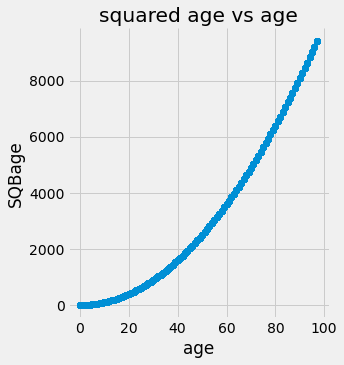

In [57]:
sns.lmplot('age', 'SQBage', data=data, fit_reg=False)
plt.title('squared age vs age')

In [58]:
data = data.drop(columns=sqr_)
data.shape

(33413, 136)

### 7.4. Id Variables
Id 값은 각 데이터를 식별하기 위해 반드시 필요하므로 제거하지 않는다.

### 7.5. Household Level  Variables

In [59]:
heads = data.loc[data['parentesco1']==1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
print('가구 수준 데이터의 크기 :', heads.shape)
heads.head()

가구 수준 데이터의 크기 : (10307, 99)


Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
5  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
8  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
5            0          0            0         0         0          0   
8            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
5            0           0           1          0          0            0   
8            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
5           0          1               0          0          0          1   
8           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
5                1               0            0       1        0       0   
8                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
5        0           0           1           0           0           0   
8        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
5              0              1              0              0          1   
8              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
5          0          0          0          0          0        0        0   
8          0          0          0          0          0        1        0   

   epared3  etecho1  etecho2  etecho3  eviv1  eviv2  eviv3  tipovivi1  \
0        0        1        0        0      1      0      0          0   
1        0        0        1        0      0      1      0          0   
2        0        0        0        1      0      0      1          1   
5        1        0        0        1    

#### 7.5.1. Redundant Household Variables
만약 높은 상관관계를 보이는 변수 쌍이 있다면, 둘 중 하나를 제거할 필요가 있다. 우선 상관계수가 0.95가 넘는 변수들을 알아보자.

In [60]:
# 상관관계 행렬 생성
corr_matrix = heads.corr()
corr_matrix

Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target        1.000000 -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor       -0.136275  1.000000  0.593867 -0.086701 -0.066409    -0.113787   
hacapo       -0.096313  0.593867  1.000000 -0.123276 -0.075336    -0.094350   
v14a          0.068230 -0.086701 -0.123276  1.000000  0.145417     0.065795   
refrig        0.119607 -0.066409 -0.075336  0.145417  1.000000     0.128958   
...                ...       ...       ...       ...       ...          ...   
hogar_adul    0.127904  0.043431  0.046811  0.042932  0.095142     0.077227   
hogar_mayor  -0.025173 -0.058321 -0.043296  0.017662  0.019801     0.052410   
hogar_total  -0.111557  0.246793  0.195462  0.007458  0.056927    -0.033010   
bedrooms      0.135203 -0.189177 -0.126525  0.080487  0.137889     0.166149   
qmobilephone  0.168685  0.026514  0.036755  0.046128  0.134561     0.073779   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul      -0.024205  -0.050961    -0.071587 -0.019126 -0.029333   
hogar_mayor      0.017119  -0.086869    -0.078257 -0.019208  0.025679   
hogar_total     -0.010640   0.031997     0.041957  0.019260  0.000551   
bedrooms        -0.032534  -0.079613    -0.165024 -0.057864 -0.096135   
qmobilephone    -0.046875   0.010504    -0.078906 -0.023568 -0.079445   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul    -0.004375    -0.003967    0.004132    0.082065   0.004132   
hogar_mayor   -0.030207     0.015424    0.003259    0.069048   0.007689   
hogar_total    0.044309    -0.006349    0.003235   -0.042462   0.015317   
bedrooms      -0.052869    -0.009185   -0.007966    0.199451   0.018329   
qmobilephone   0.000407    -0.016652   -0.005257    0.110785   0.004745   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul    -0.005050    -0.013116   -0.026497   0.023670       -0.028640   
hogar_mayor    0.021459    -0.024801    0.012454  -0.002127        0.002354   
hogar_total    0.000119     0.038302   -0.011582   0.014178       -0.029371   
bedrooms      -0.017781    -0.090485   -0.053870   0.026258       -0.020845   
qmobilephone  -0.006242    -0.041059   -0.055693   0.016296       -0.011084   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig    

In [61]:
# 위쪽 삼각형 마스킹을 생성해 위쪽 삼각형만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

Target    hacdor    hacapo      v14a    refrig  paredblolad  \
Target           NaN -0.136275 -0.096313  0.068230  0.119607     0.254469   
hacdor           NaN       NaN  0.593867 -0.086701 -0.066409    -0.113787   
hacapo           NaN       NaN       NaN -0.123276 -0.075336    -0.094350   
v14a             NaN       NaN       NaN       NaN  0.145417     0.065795   
refrig           NaN       NaN       NaN       NaN       NaN     0.128958   
...              ...       ...       ...       ...       ...          ...   
hogar_adul       NaN       NaN       NaN       NaN       NaN          NaN   
hogar_mayor      NaN       NaN       NaN       NaN       NaN          NaN   
hogar_total      NaN       NaN       NaN       NaN       NaN          NaN   
bedrooms         NaN       NaN       NaN       NaN       NaN          NaN   
qmobilephone     NaN       NaN       NaN       NaN       NaN          NaN   

              paredzocalo  paredpreb  pisocemento  pareddes  paredmad  \
Target          -0.078851  -0.104545    -0.209131 -0.096893 -0.152979   
hacdor           0.026165   0.019816     0.110713  0.122610  0.068846   
hacapo           0.022254   0.007634     0.089127  0.134901  0.042265   
v14a             0.002527   0.007668    -0.020410 -0.128082 -0.068496   
refrig          -0.042125  -0.006812    -0.099088 -0.088633 -0.114895   
...                   ...        ...          ...       ...       ...   
hogar_adul            NaN        NaN          NaN       NaN       NaN   
hogar_mayor           NaN        NaN          NaN       NaN       NaN   
hogar_total           NaN        NaN          NaN       NaN       NaN   
bedrooms              NaN        NaN          NaN       NaN       NaN   
qmobilephone          NaN        NaN          NaN       NaN       NaN   

              paredzinc  paredfibras  paredother  pisomoscer  pisoother  \
Target        -0.040128    -0.039861    0.005231    0.275452   0.016832   
hacdor         0.086632    -0.007015   -0.005960   -0.143259  -0.005960   
hacapo         0.118369    -0.005219   -0.004434   -0.120922  -0.004434   
v14a          -0.034484     0.003483    0.002960    0.094633   0.002960   
refrig        -0.049882    -0.013233    0.007742    0.184785   0.007742   
...                 ...          ...         ...         ...        ...   
hogar_adul          NaN          NaN         NaN         NaN        NaN   
hogar_mayor         NaN          NaN         NaN         NaN        NaN   
hogar_total         NaN          NaN         NaN         NaN        NaN   
bedrooms            NaN          NaN         NaN         NaN        NaN   
qmobilephone        NaN          NaN         NaN         NaN        NaN   

              pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
Target        -0.054463    -0.114144   -0.103487   0.014357        0.032872   
hacdor         0.026892     0.116650    0.026372  -0.036627       -0.007641   
hacapo        -0.002458     0.115475    0.023931  -0.047382       -0.007023   
v14a          -0.057915    -0.140181   -0.076321   0.047145        0.012098   
refrig        -0.019392    -0.162552   -0.105376   0.016262        0.015251   
...                 ...          ...         ...        ...             ...   
hogar_adul          NaN          NaN         NaN        NaN             NaN   
hogar_mayor         NaN          NaN         NaN        NaN             NaN   
hogar_total         NaN          NaN         NaN        NaN             NaN   
bedrooms            NaN          NaN         NaN        NaN             NaN   
qmobilephone        NaN          NaN         NaN        NaN             NaN   

              techocane  techootro  cielorazo  abastaguadentro  \
Target        -0.026240   0.031516   0.295249         0.062961   
hacdor        -0.008595  -0.006613  -0.148678        -0.036094   
hacapo        -0.006394  -0.004920  -0.131246        -0.038001   
v14a           0.004268   0.003284   0.087430         0.169428   
refrig         0.002038   0.0085

In [62]:
# 상관계수가 0.95보다 큰 피처들의 인덱스 추출
to_drop = [col for col in upper.columns if any(abs(upper[col]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

##### 7.5.1.1. tamhog feature

In [63]:
data['tamhog'].value_counts()

4     8736
3     7664
5     5607
2     4682
6     2917
7     1307
1     1300
8      576
9      288
10     160
11      88
13      52
12      36
Name: tamhog, dtype: int64

In [64]:
# tamhog와 상관관계가 높은 피처 추출
tamhog_corr = corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]
tamhog_corr

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

`tamhog`는 **가구의 크기**를 뜻한다. `tamhog`와 상관관계가 높은 나머지 변수들은 **집의 크기**와 관련있는 변수들이다. 각 변수에 대한 설명을 보면 비슷한 변수임을 알 수 있다.
* `r4t3` : 가구의 총 사람 수
* `tamviv` : 가구에 실제 살고 있는 사람의 수
* `hhsize` : 가구의 크기
* `hogar_total` : 가구의 총 인원 수

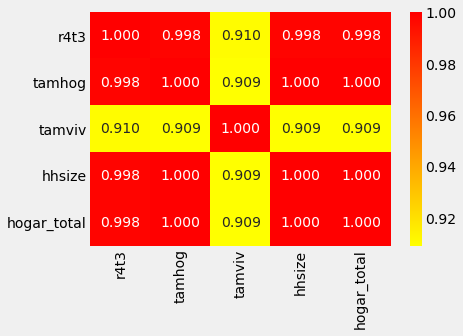

In [65]:
# 위의 행렬을 heatmap으로 시각화
sns.heatmap(tamhog_corr, annot=True, cmap=plt.cm.autumn_r, fmt='.3f')

위의 5개의 변수는 높은 상관관계를 보이며 `hhsize`는 `tamhog`, `hogar_total`과 완벽한 선형성을 보여준다. `r4t3` 또한 거의 1에 가까운 선형성을 보여주기 때문에 `tamhog`, `hogar_total`, `r4t3` 변수를 제거해줄 것이다.

`tamviv`는 **실제로 가구에 살고 있는 사람의 수**, `hhsize`는 **가구의 크기**이므로 이 둘은 다를 수 있다. 왜냐하면 해당 가구에 살고 있지 않는 가족이 있을 수 있기 때문이다. 이를 scatterplot을 그려 살펴보자.

In [66]:
heads = heads.drop(columns=['tamhog', 'hogar_total', 'r4t3'])
heads.shape

(10307, 96)

C:\Users\round\Anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'household size vs number of persons living in the household')

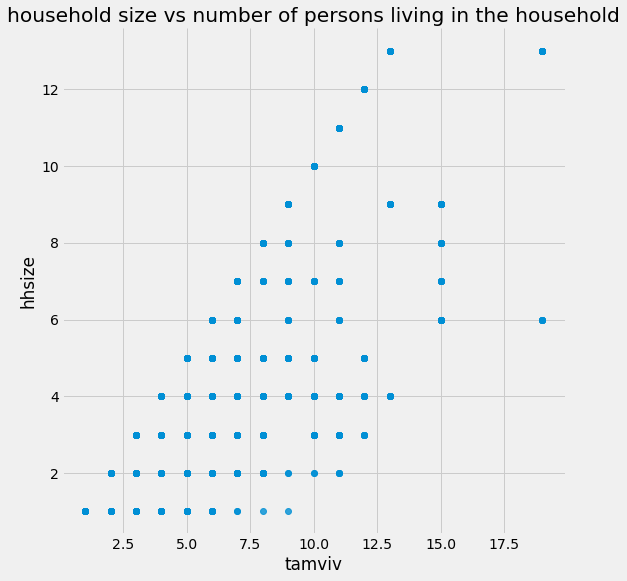

In [67]:
# tamviv와 hhsize의 분포 - scatterplot
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size=8)
plt.title('household size vs number of persons living in the household')

이처럼 등록된 가구원의 수와 실제 집에 살고 있는 수가 다를 수 있다는 것을 볼 수 있다. 이 차이를 보여주는 변수 `hhsize-diff`를 생성해주자.

In [68]:
# 등록된 가구원의 수와 실 가구원의 수 차이를 나타내는 hhsize-diff 피처 생성
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
heads['hhsize-diff']

0        0
1        0
2        0
5        0
8        0
        ..
33393    0
33398    0
33400    0
33404    0
33409    0
Name: hhsize-diff, Length: 10307, dtype: int64

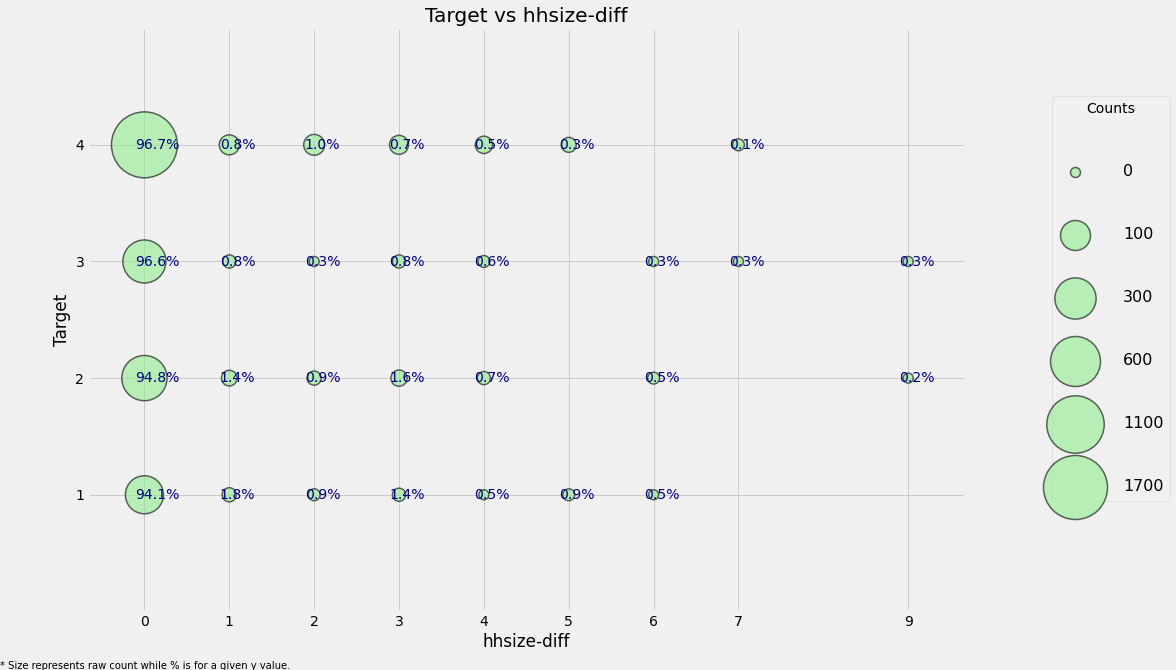

In [69]:
plot_categoricals('hhsize-diff', 'Target', heads)

##### 7.5.1.2. coopele feature

In [70]:
heads['coopele'].value_counts()

0    9151
1    1156
Name: coopele, dtype: int64

In [71]:
# coopele와 상관관계가 높은 피처 추출
coopele_corr = corr_matrix.loc[corr_matrix['coopele'].abs()>0.9, corr_matrix['coopele'].abs()>0.9]
coopele_corr

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

`coopele`는 **협동 조합에서 전기가 왔는지**를 나타내는 변수이다. `public`은 CNFL, ICE, ESPH/JASEX 등의 **전기 회사에서 왔는지**를 나타낸다. 위의 변수들을 포함하여 **어디서 전기가 왔는지**를 나타내는 불리언 변수 4가지가 존재한다.

* `noelec` : 전기가 없음
* `coopele` : 전기 from 협동조합
* `public` : 전기 from 전기회사 (ex. CNFL, ICE, ESPH/JASEX)
* `planpri` : 전기 from 개인 발전

이 변수들을 한 번에 묶어 **어디서 전기가 왔는지**를 나타내는 새로운 변수를 생성해주자.

In [72]:
elec = []

for i, row in heads.iterrows():
    # 전기가 없음
    if row['noelec'] == 1:
        elec.append(0)
    # 협동조합으로부터 전기 얻음
    elif row['coopele'] == 1:
        elec.append(1)
    # 전기회사로부터 전기 얻음
    elif row['public'] == 1:
        elec.append(2)
    # 자가발전으로 전기 얻음
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [73]:
# 어디서 전기가 왔는지를 나타내는 새로운 변수 elec 생성
heads['elec'] = elec
# 어디서 온지 모른 경우 → flag 피처를 생성
heads['elec-missing'] = heads['elec'].isnull()
# 기존의 피처들 제거
heads = heads.drop(columns=['noelec', 'coopele', 'public', 'planpri'])

heads[['elec', 'elec-missing']].head()

elec  elec-missing
0   2.0         False
1   2.0         False
2   2.0         False
5   2.0         False
8   2.0         False

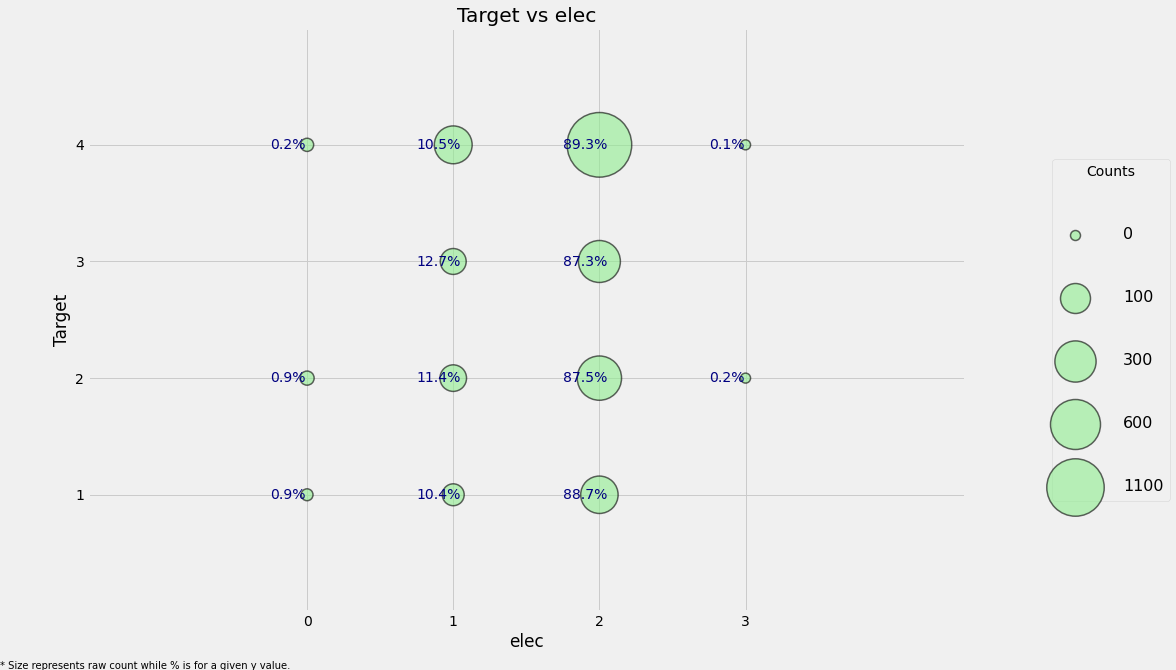

In [74]:
plot_categoricals('elec', 'Target', heads)

전기를 공급받는 가장 흔한 방법은 **전기회사**로부터 받는 것이다.

##### 7.5.1.3. area2 feature
`area2`는 **집이 교외에 있는지**를 나타내는 변수이다. `area1`은 **집이 도심에 있는지**를 나타내는데 `area2`와 `area1`은 여자/남자와 같은 관계로 두 변수가 중복되었음을 알 수 있다.

그러므로 `area2`를 제거해서 `area1`만 남겨두자.

In [75]:
# area2와 높은 상관관계를 가지는 변수들
corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9]

area1  area2
area1    1.0   -1.0
area2   -1.0    1.0

In [76]:
# area2 제거
heads = heads.drop(columns='area2')

In [77]:
# area1의 값별 타켓 값 분포
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

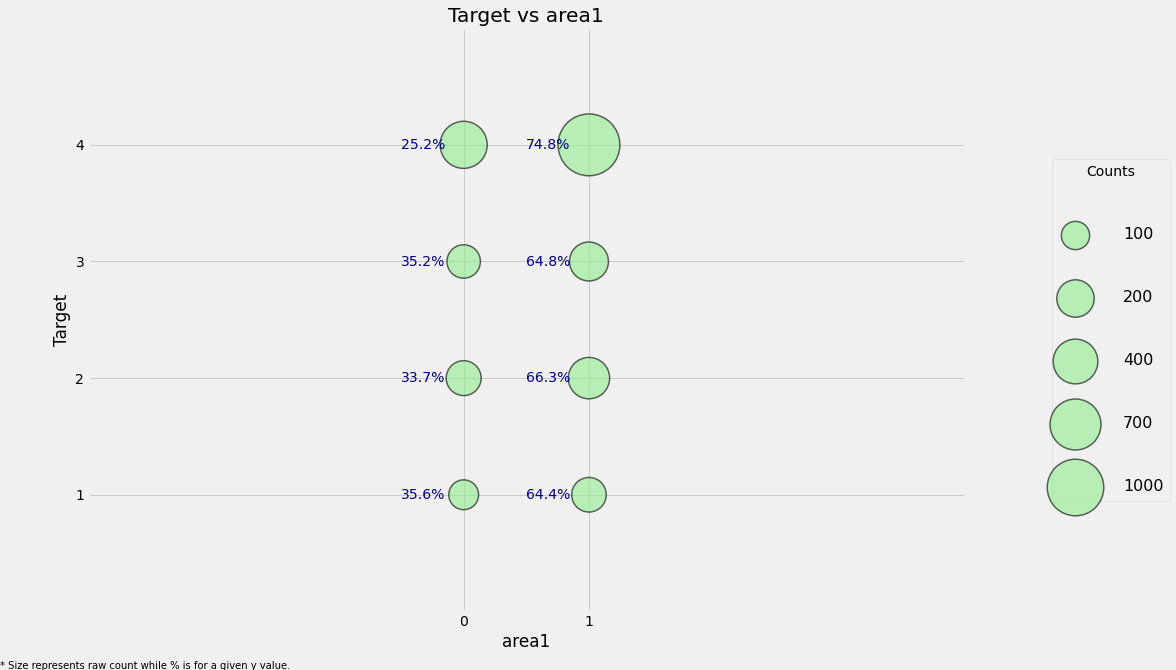

In [78]:
plot_categoricals('area1', 'Target', heads)

#### 7.5.2. Creating Ordinal Variables
가구와 관련된 변수 중 각 **벽, 지붕, 바닥**과 관련되어 좋고 나쁨을 표현하는 3개의 변수가 존재한다. 각각 벽, 지붕, 바닥과 관련하여 **상태가 어떠한지를 나타내는** 서수형 변수로 변환해주자. 

##### 7.5.2.1. wall feature

In [79]:
# 벽(wall)과 관련된 변수
heads[['epared1', 'epared2', 'epared3']]

epared1  epared2  epared3
0            0        1        0
1            0        1        0
2            0        1        0
5            0        0        1
8            1        0        0
...        ...      ...      ...
33393        0        1        0
33398        1        0        0
33400        0        1        0
33404        1        0        0
33409        0        0        1

[10307 rows x 3 columns]

In [80]:
np.array(heads[['epared1', 'epared2', 'epared3']])

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int64)

In [81]:
# 벽의 상태와 관련된 서수형 변수 wall 생성
heads['wall'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['epared1', 'epared2', 'epared3'])

heads['wall'].value_counts()

2    6011
1    3203
0    1093
Name: wall, dtype: int64

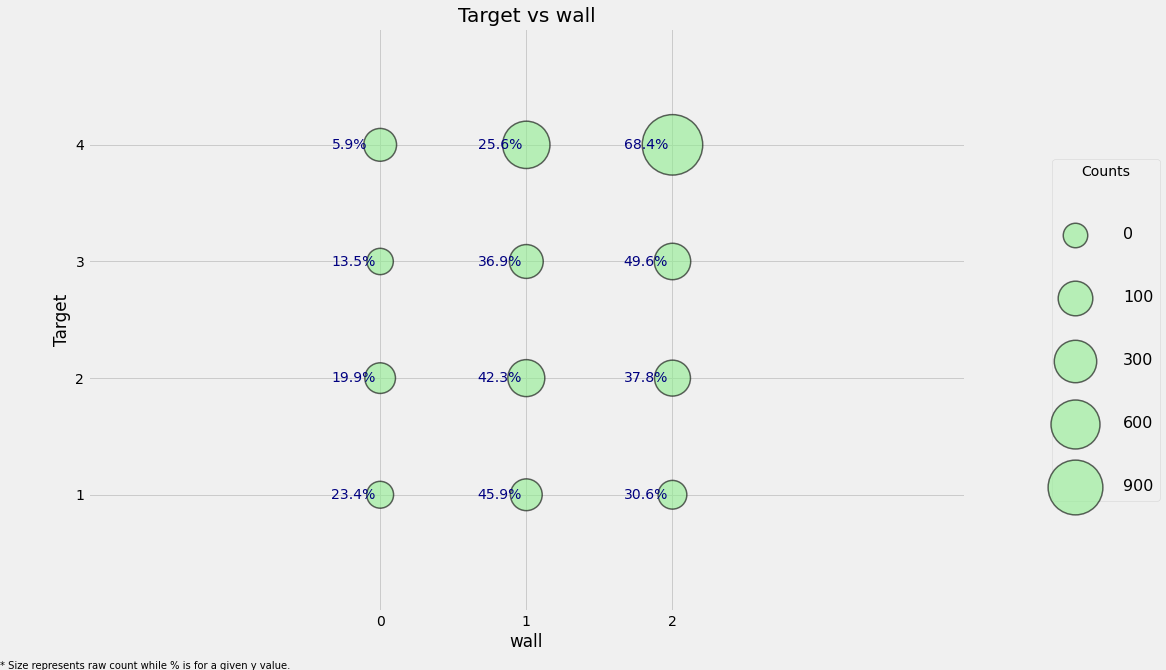

In [82]:
plot_categoricals('wall', 'Target', heads)

##### 7.5.2.2. roof feature

In [83]:
# 지붕의 상태와 관련된 서수형 변수 roof 생성
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['etecho1', 'etecho2', 'etecho3'])

heads['roof'].value_counts()

2    6005
1    3011
0    1291
Name: roof, dtype: int64

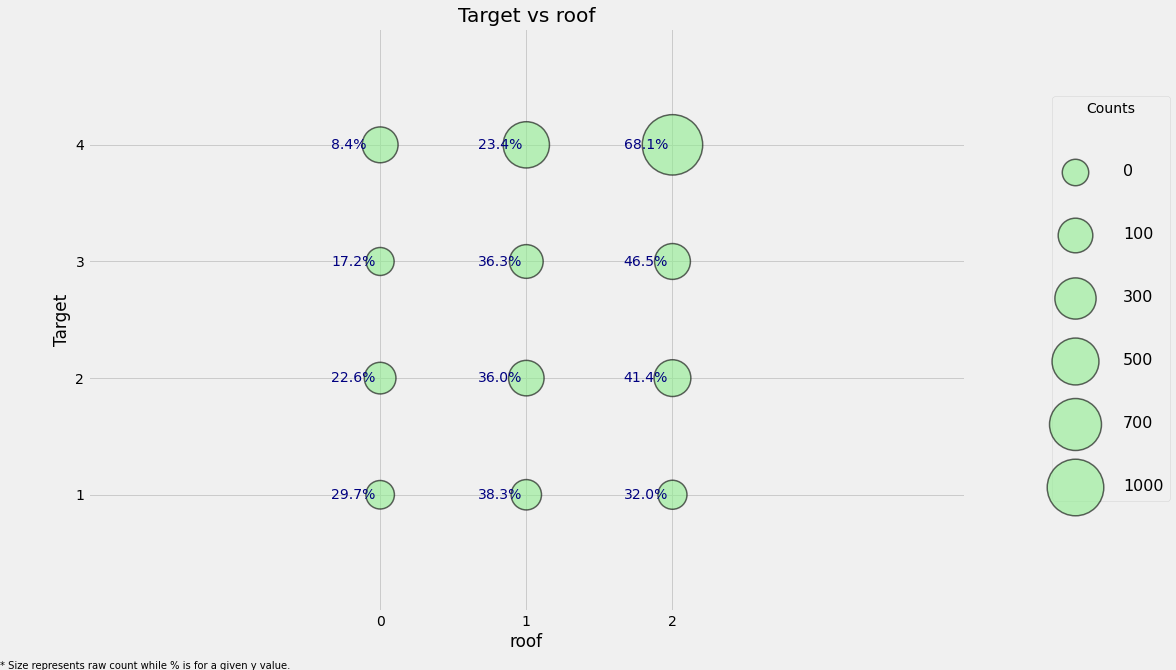

In [84]:
plot_categoricals('roof', 'Target', heads)

##### 7.5.2.3. floor feature

In [85]:
# 바닥의 상태와 관련된 서수형 변수 floor 생성
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]), axis=1)
# 기존 변수들 제거
heads = heads.drop(columns=['eviv1', 'eviv2', 'eviv3'])

heads['floor'].value_counts()

2    6665
1    2635
0    1007
Name: floor, dtype: int64

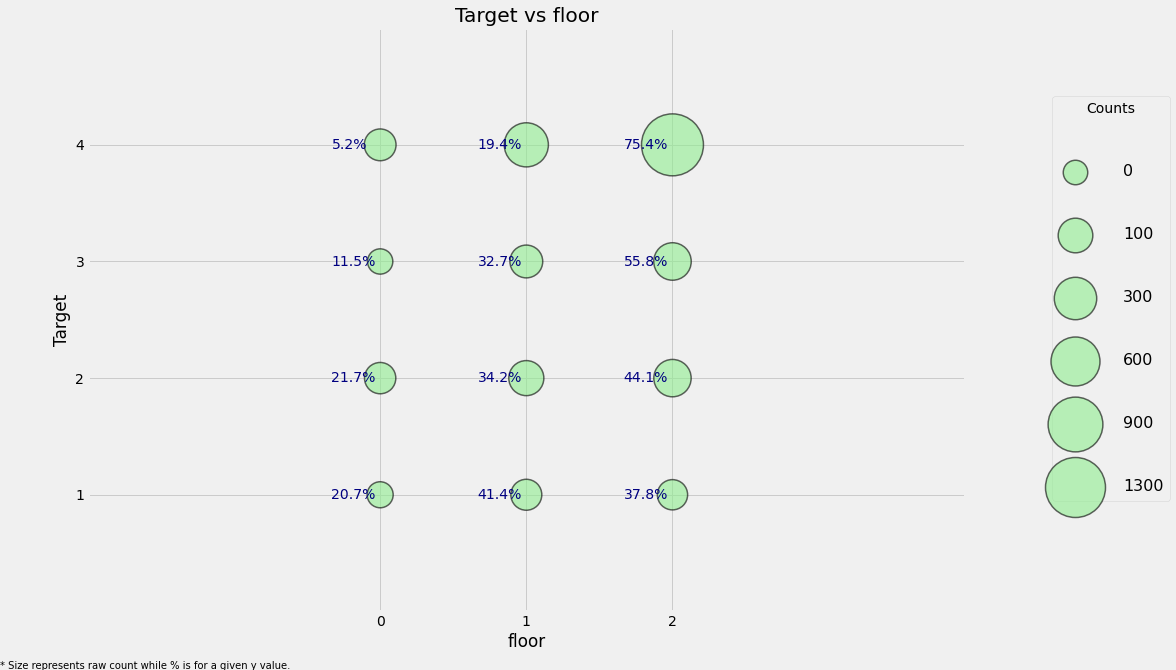

In [86]:
plot_categoricals('floor', 'Target', heads)

#### 7.5.3. Feature Construction
기존의 피처를 가지고 새로운 피처를 만들 수도 있다. 예를 들면, 앞서 만들었던 `wall`, `roof`, `floor`를 합쳐서 하나의 피처로 생성할 수 있다.

##### 7.5.3.1. wall+roof+floor feature

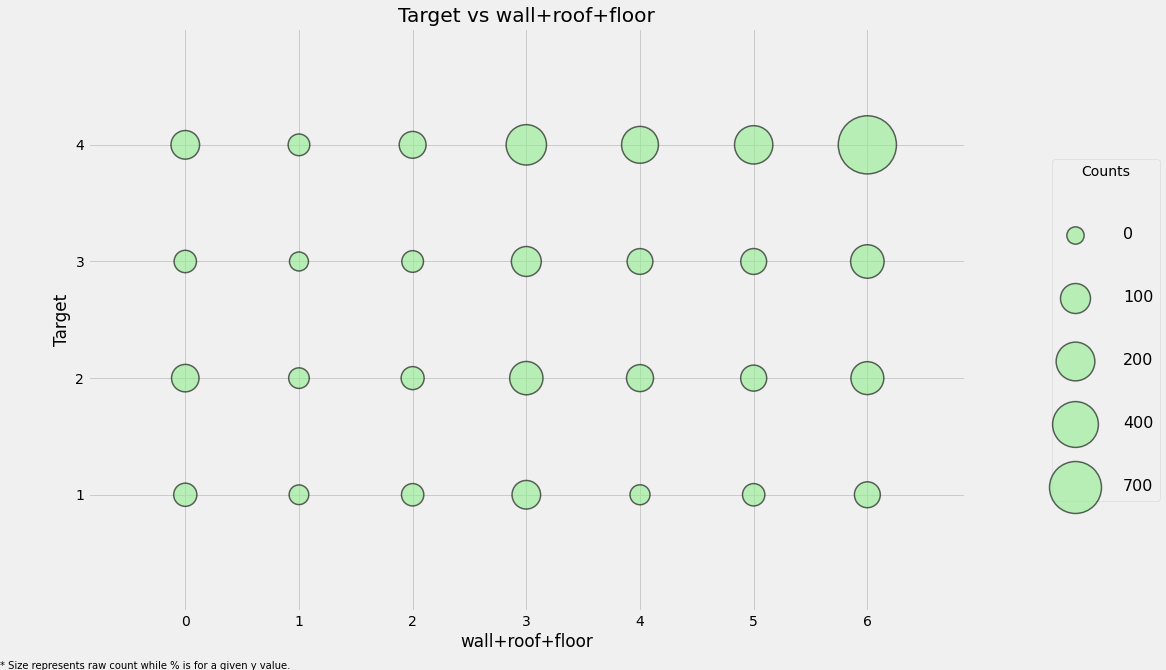

In [87]:
# wall, roof, floor의 개수를 모두 합친 wall+roof+floor 피처 생성
heads['wall+roof+floor'] = heads['wall'] + heads['roof'] + heads['floor']
plot_categoricals('wall+roof+floor', 'Target', heads, annotate=False)

분포를 보면 **타겟 값이 4인 가구가 대체로 집의 품질이 좋음**을 판단할 수 있다. 이를 시각화해서 세부적으로 살펴보자.

In [88]:
# wall+roof+floor와 Target값별 데이터의 수 분포
count = pd.DataFrame(heads.groupby('wall+roof+floor')['Target'].value_counts(
    normalize=True)).rename(columns={'Target': 'Nomarlized Count'}).reset_index()
count.head(10)

wall+roof+floor  Target  Nomarlized Count
0                0     4.0          0.376404
1                0     2.0          0.320225
2                0     1.0          0.162921
3                0     3.0          0.140449
4                1     4.0          0.323529
5                1     2.0          0.264706
6                1     1.0          0.220588
7                1     3.0          0.191176
8                2     4.0          0.409449
9                2     2.0          0.220472

##### 7.5.3.2. warning feature
이제 집의 위험도를 나타내는 `warning` 변수를 생성해주자. 이 변수는 화장실, 전기, 바닥, 수도, 천장이 없는 경우 -1점씩 감점되어 나타낼 것이다.

In [89]:
# 집의 위험도를 나타내는 warning 피처 생성
# 화장실, 전기, 바닥, 수도, 천장 여부로 판단
heads['warning'] =  1 * (heads['sanitario1'] + (heads['elec'] == 0) +
                        heads['pisonotiene'] + heads['abastaguano'] + (heads['cielorazo'] == 0))
heads['warning'].value_counts()

0    7045
1    3061
2     159
3      32
4      10
Name: warning, dtype: int64

Text(0.5, 1.0, 'target vs warning variable')

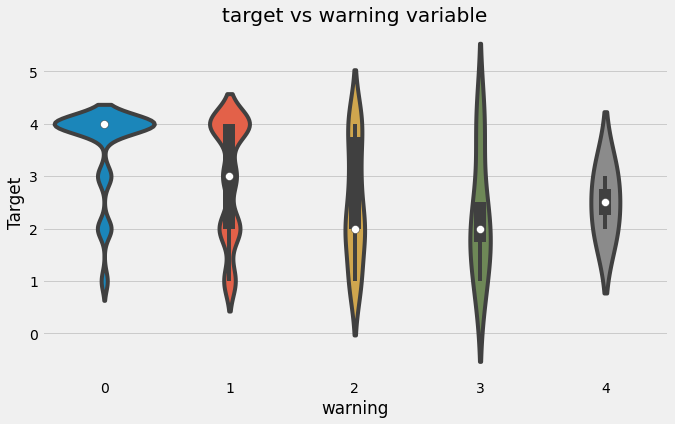

In [90]:
# 각 warning의 값별 Target값 분포 - violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='warning', y='Target', data=heads)
plt.title('target vs warning variable')

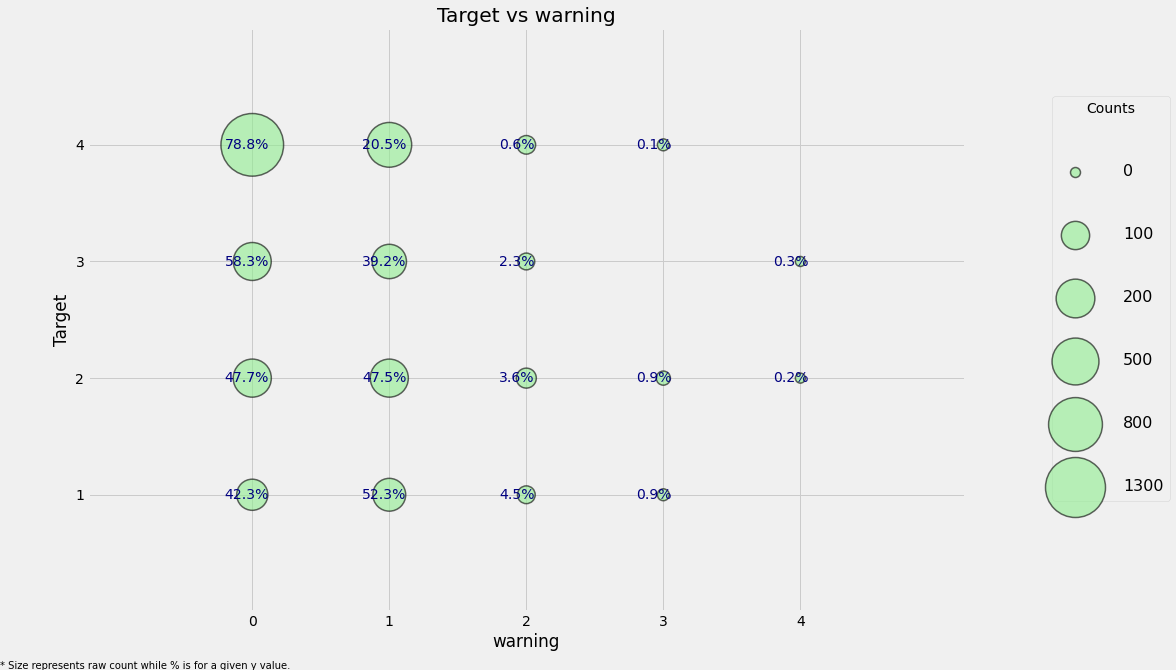

In [91]:
plot_categoricals('warning', 'Target', data=heads)

violinplot과 바로 위의 scatterplot을 비교해봤을 때 violinplot은 그닥 좋아보이지 않는다. 왜냐하면 `warning`의 각 값별 개수는 많이 다른데 단순히 개수가 아닌 분포로만 보기 때문이다.

어쨌든 **가구들의 위험요소가 적으면 빈곤 정도가 낮다**는 것을 알 수 있다.

##### 7.5.3.3. per capita features
다음은 냉장고, 컴퓨터, 태블릿, TV 같은 가전을 얼마나 갖고 있는지를 나타내는 `bonus` 피처이다.

In [92]:
# 냉장고, 컴퓨터, 태블릿, TV 소유 여부
heads['bonus'] = 1 + (heads['refrig'] + heads['computer'] +
                      (heads['v18q1'] > 0) + heads['television'])
heads['bonus'].value_counts()

2    5497
3    3023
4    1136
1     415
5     236
Name: bonus, dtype: int64

Text(0.5, 1.0, 'target vs bonus variable')

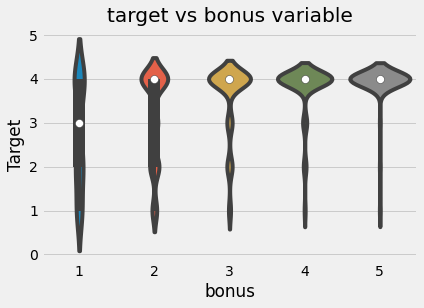

In [93]:
sns.violinplot('bonus', 'Target', data=heads, figsize=(10, 6))
plt.title('target vs bonus variable')

다음은 **1인당 소유하고 있는 핸드폰, 태블릿, 방의 개수, 월세**를 나타내는 변수들이다. 소유하고 있는 원래 피처 값에 가구원수를 나누어 계산한다.

In [94]:
# 한 명당 가지고 있는 핸드폰, 태블릿, 방, 월세값
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

heads[['phones-per-capita', 'tablets-per-capita',
       'rooms-per-capita', 'rent-per-capita']].head()

phones-per-capita  tablets-per-capita  rooms-per-capita  rent-per-capita
0               1.00                0.00              3.00         190000.0
1               1.00                1.00              4.00         135000.0
2               0.00                0.00              8.00              0.0
5               0.75                0.25              1.25          45000.0
8               0.25                0.00              0.50          32500.0

#### 7.5.4. Explore Variables
이제 문제가 있는 피처를 제거하고 새로운 피처를 생성하였으니 **타켓과 변수 간의 관계**를 살펴보자.

##### 7.5.4.1. Measuring Relationships
두 변수 간 관계를 알아내는 방법은 다양하지만 대표적으로 두 가지 상관계수가 있다.
* **피어슨 상관계수** : 일반적으로 사용되는 상관계수
* **스피어맨 상관계수** : 값이 점차적으로 증가 혹은 감소하는 관계를 갖는지 보여주는 지표

이 두 상관계수의 차이는 **선형적이냐**이다. 스피어맨 상관관계는 한 변수가 증가할 때 다른 변수도 증가하면, 선형적인 관계가 아니더라도 1이다. 반면 피어슨 상관계수는 이 관계가 무조건 선형적이어야 한다.

###### Pearson Correlations

In [95]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

# 피어슨 상관계수 데이트프레임 생성
pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns={'Target':'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns={'index': 'feature'})

print('음의 상관관계를 가진 변수들 TOP 5')
print(pcorrs.head())

print('\n양의 상관관계를 가진 변수들 TOP 5')
print(pcorrs.dropna().tail())

음의 상관관계를 가진 변수들 TOP 5
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4          r4m1 -0.209479

양의 상관관계를 가진 변수들 TOP 5
              feature     pcorr
87  phones-per-capita  0.299026
88              floor  0.307605
89    wall+roof+floor  0.332446
90           meaneduc  0.333652
91             Target  1.000000


* `warning`이 높을수록 가구가 더 빈곤하다.
* 0세에서 19세까지의 가구원의 수인 `hogar_nin`이 높을수록 더 빈곤하다.
* 평균 교육 수준인 `meaneuc`가 높을수록 덜 빈곤하다.

###### Spearman Correlations

In [97]:
from scipy.stats import spearmanr
# 경고 무시
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

feats = []    # 피처
scorr = []    # 스피어맨 상관계수
pvalues = []  # 유의수준

for c in heads:
    if heads[c].dtype != 'object':
        feats.append(c)
        # 스피어맨 상관계수와 유의수준 계산 및 기록
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)
        
scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

In [98]:
print('음의 스피어맨 상관계수 TOP 5:')
print(scorrs.head())
print('\n양의 스피어맨 상관계수 TOP 5:')
print(scorrs.dropna().tail())

음의 스피어맨 상관계수 TOP 5:
        feature     scorr        pvalue
87      warning -0.307326  4.682829e-66
58   dependency -0.281516  2.792620e-55
75    hogar_nin -0.236225  5.567218e-39
70         r4t1 -0.219226  1.112230e-33
8   pisocemento -0.209387  8.270816e-31

양의 스피어맨 상관계수 TOP 5:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
85              floor  0.309638  4.466091e-67
89  phones-per-capita  0.337377  4.760104e-80
86    wall+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


스피어맨 상관계수는 관계의 유의수준을 나타내는 **pvalue**도 함꼐 계산한다. 여기서 임의의 pvalue가 0.05보다 작으면 이 계수가 유의하다고 판단한다.

###### Difference between Pearson and Spearman
피어슨 상관계수와 스피어맨 상관계수의 값이 얼마나 차이가 나는지 알아보자.

In [99]:
# 피어슨 상관계수 데이터프레임에 스피어맨 상관계수 데이터프레임 병합
corrs = pcorrs.merge(scorrs, on='feature')
# 피어슨 상관계수와 스피어맨 상관게수의 차이
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
69    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
77               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
79  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
87   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [100]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
50    techozinc  0.014357  0.003404  8.528369e-01  0.010954
44  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
80       edjefe  0.235687  0.214736  2.367521e-32  0.020951
58       edjefa  0.052310  0.005114  7.804715e-01  0.047197
13   dependency -0.126465 -0.281516  2.792620e-55  0.155051

두 계수가 가장 차이를 보이는 변수는 `dependency`이다. 이 변수와 타겟 값과의 관계를 살펴보기 위해 scatterplot으로 시각화해보자. 참고로 두 변수 모두 이산적인 값을 가졌기 때문에 jitter를 조금 추가할 것이다.

Text(0.5, 1.0, 'target vs dependency')

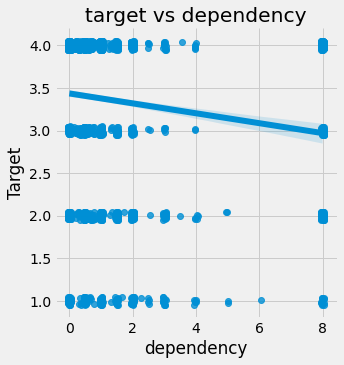

In [101]:
sns.lmplot('dependency', 'Target', fit_reg=True, data=train_heads, x_jitter=0.05, y_jitter=0.05)
plt.title('target vs dependency')

`dependency`는 타겟과 음의 상관관계를 가짐을 알 수 있다. 왜냐하면 부양해야할 가족의 비율이 높을수록 더 빈곤해지기 때문이다. 

###### Correlation Heatmap

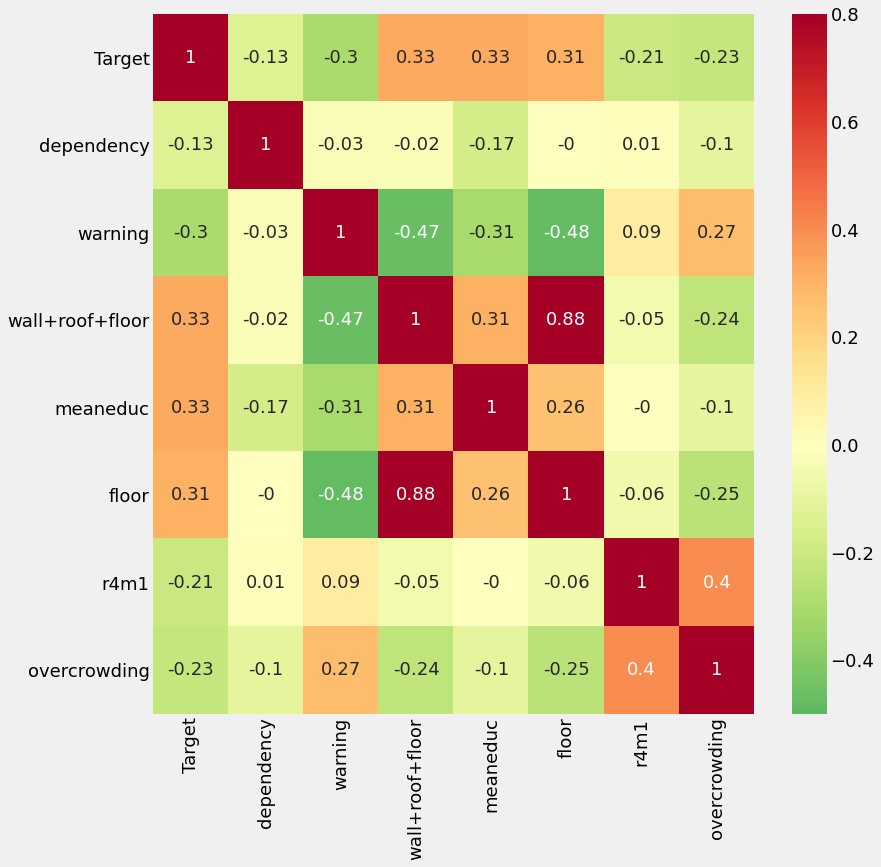

In [102]:
variables = ['Target', 'dependency', 'warning', 'wall+roof+floor',
             'meaneduc', 'floor', 'r4m1', 'overcrowding']

# 상관관계 행렬
corr_mat = train_heads[variables].corr().round(2)
plt.rcParams['font.size'] = 18
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat, vmin=-0.5, vmax=0.8, center=0,
            cmap=plt.cm.RdYlGn_r, annot=True)

히트맵으로 보아 타겟과 **약한 상관관계를 가지는 변수들이 많음**을볼 수 있다. 몇몇 변수들은 높은 상관관계를 보이는 이는 **공선성(collinearlity) 문제**를 일으킬 수 있으므로 주의해야한다.

#### 7.5.5. Features Plot
마지막으로 타겟과의 상관관계가 큰 변수들 몇 가지를 그래프로 시각화해보자. pairplot으로 그릴 예정이며 위쪽 삼각형은 scatterplot, 대각선은 kdeplot, 아래쪽 삼각형은 2d kdeplot으로 나타낼 것이다.

Text(0.5, 1.05, 'feature plots covered by target')

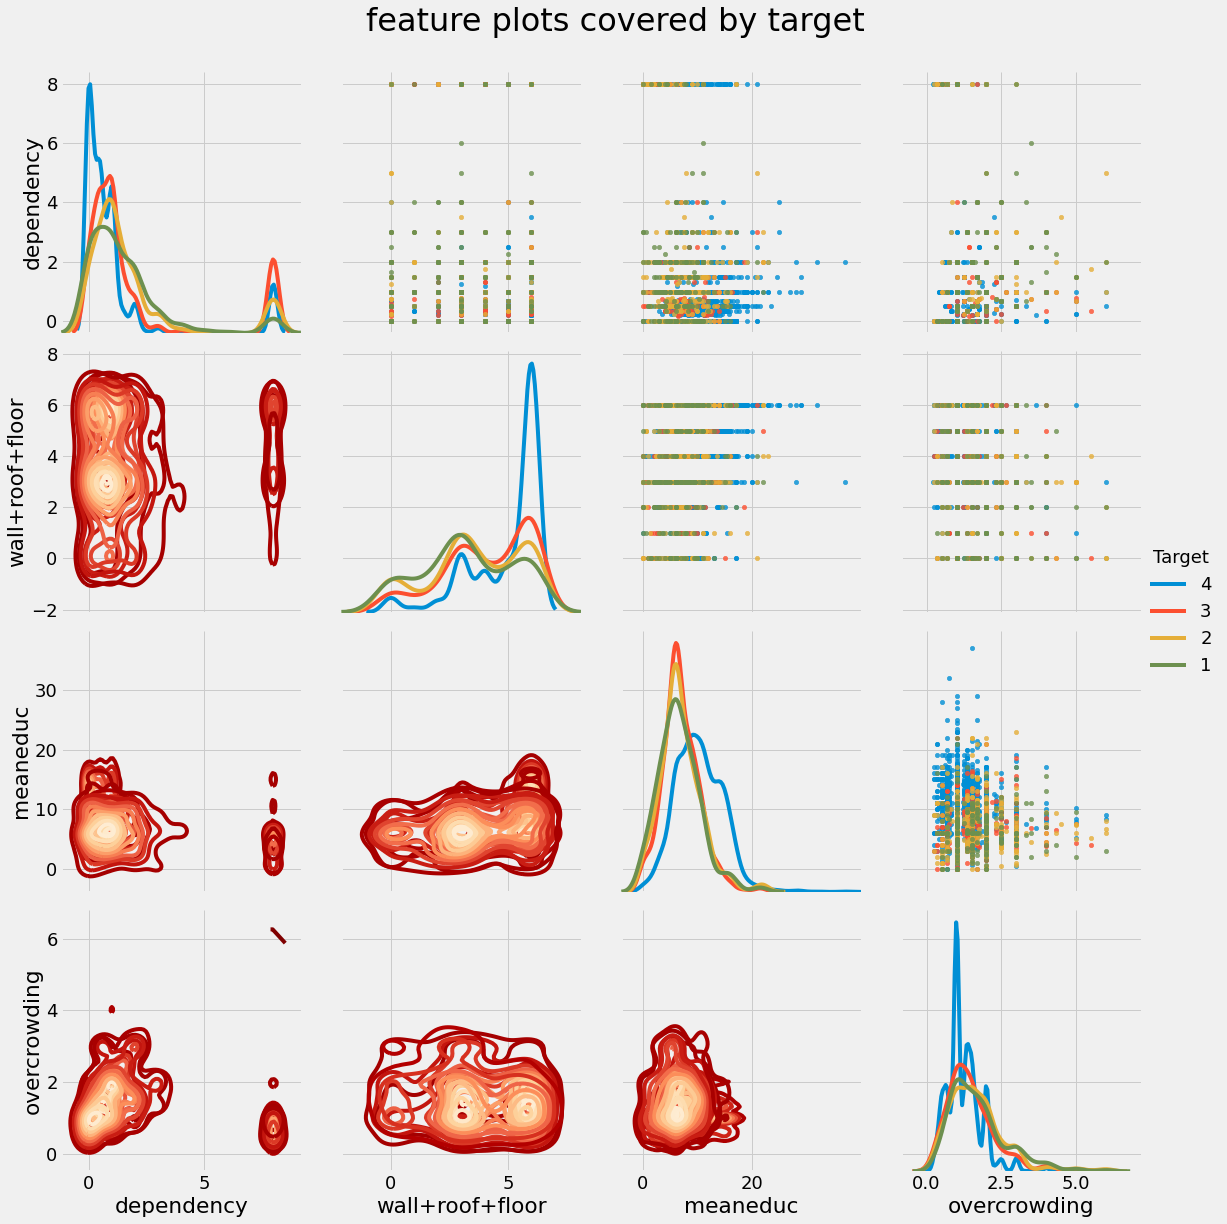

In [103]:
import warnings
warnings.filterwarnings('ignore')

# 타겟과 상관관계가 높은 피처들 추출
plot_data = train_heads[['Target', 'dependency', 'wall+roof+floor', 'meaneduc', 'overcrowding']]

# pairgrid 객체 생성
grid = sns.PairGrid(data=plot_data, size=4, diag_sharey=False,
                   hue='Target', hue_order=[4, 3, 2, 1],
                   vars=[x for x in list(plot_data.columns) if x != 'Target'])

# 위쪽 삼각형 - scatterplot
grid.map_upper(plt.scatter, alpha=0.8, s=20)

# 대각선 - kdeplot
grid.map_diag(sns.kdeplot)

# 아래쪽 삼각형 - 2d kdeplot
grid.map_lower(sns.kdeplot, cmap=plt.cm.OrRd_r)

grid = grid.add_legend()
plt.suptitle('feature plots covered by target', size=32, y=1.05)

#### 7.5.6. Final Household Level Variables

In [104]:
household_feats = list(heads.columns)

### 7.6. Individual Level Variables

In [105]:
ind = data[id_ + ind_bool + ind_ordered]
print('개인 수준의 변수 크기 :', ind.shape)

개인 수준의 변수 크기 : (33413, 40)


#### 7.6.1. Redundant Individual Variables
앞서 가구 수준의 변수에서 했던 작업처럼 똑같이 상관관계가 높은 변수들을 제거해주자.

In [106]:
# 개인 수준의 변수의 상관관계 행렬
corr_matrix = ind.corr()
corr_matrix

Target      v18q       dis      male    female  \
Target           1.000000  0.238864 -0.054413  0.038665 -0.038665   
v18q             0.238864  1.000000 -0.058450 -0.014958  0.014958   
dis             -0.054413 -0.058450  1.000000  0.010869 -0.010869   
male             0.038665 -0.014958  0.010869  1.000000 -1.000000   
female          -0.038665  0.014958 -0.010869 -1.000000  1.000000   
estadocivil1    -0.135651  0.013259 -0.066821  0.015616 -0.015616   
estadocivil2    -0.029669 -0.038060 -0.033232  0.007696 -0.007696   
estadocivil3     0.129730  0.054984  0.021577  0.014177 -0.014177   
estadocivil4     0.054134  0.007942  0.015351 -0.058994  0.058994   
estadocivil5    -0.049727 -0.041245  0.017328 -0.074976  0.074976   
estadocivil6    -0.003372 -0.037941  0.147802 -0.102748  0.102748   
estadocivil7     0.004585 -0.002909 -0.019231  0.069358 -0.069358   
parentesco1      0.037903 -0.028587  0.072866  0.175917 -0.175917   
parentesco2      0.057042  0.013562 -0.013630 -0.322286  0.322286   
parentesco3     -0.053989  0.022043 -0.078058  0.079809 -0.079809   
parentesco4     -0.020887 -0.003138 -0.009251  0.002162 -0.002162   
parentesco5      0.016534  0.007227 -0.020307  0.011828 -0.011828   
parentesco6     -0.068125 -0.003049 -0.030731  0.018663 -0.018663   
parentesco7      0.006216  0.001089  0.104702 -0.042487  0.042487   
parentesco8      0.008562  0.005433  0.057437 -0.030515  0.030515   
parentesco9      0.012318 -0.015486  0.044330  0.029797 -0.029797   
parentesco10     0.010990 -0.003713  0.003689  0.004601 -0.004601   
parentesco11    -0.019076 -0.004911  0.010195  0.006375 -0.006375   
parentesco12     0.014421 -0.004084 -0.006324  0.018144 -0.018144   
instlevel1      -0.147883 -0.034515  0.046328  0.015497 -0.015497   
instlevel2      -0.159210 -0.066954  0.059857  0.002544 -0.002544   
instlevel3      -0.021986 -0.100942  0.034322  0.022733 -0.022733   
instlevel4       0.014759 -0.026705 -0.032973  0.006580 -0.006580   
instlevel5       0.078153  0.035511 -0.037454 -0.013398  0.013398   
instlevel6      -0.006014 -0.011535 -0.017521  0.000865 -0.000865   
instlevel7       0.039288  0.001692 -0.019912  0.003807 -0.003807   
instlevel8       0.214351  0.191597 -0.058580 -0.041204  0.041204   
instlevel9       0.083856  0.097291 -0.020916  0.000778 -0.000778   
mobilephone      0.106421  0.081267 -0.109977  0.006256 -0.006256   
rez_esc-missing  0.006179 -0.013844 -0.017031  0.009469 -0.009469   
rez_esc         -0.094229 -0.047668 -0.009454  0.033915 -0.033915   
escolari         0.302305  0.191338 -0.104288 -0.039388  0.039388   
age              0.117620 -0.050829  0.234061 -0.036020  0.036020   

                 estadocivil1  estadocivil2  estadocivil3  estadocivil4  \
Target              -0.135651     -0.029669      0.129730      0.054134   
v18q                 0.013259     -0.038060      0.054984      0.007942   
dis                 -0.066821     -0.033232      0.021577      0.015351   
male                 0.015616      0.007696      0.014177     -0.058994   
female              -0.015616     -0.007696     -0.014177      0.058994   
estadocivil1         1.000000     -0.149880     -0.244306     -0.075891   
estadocivil2        -0.149880      1.000000     -0.229067     -0.071157   
estadocivil3        -0.244306     -0.229067      1.000000     -0.115987   
estadocivil4        -0.075891     -0.071157     -0.115987      1.000000   
estadocivil5        -0.100964     -0.094666     -0.154306     -0.047933   
estadocivil6        -0.074252     -0.069620     -0.113481     -0.035252   
estadocivil7        -0.286343     -0.268481     -0.437627     -0.135944   
parentesco1         -0.267031      0.109026      0.233585      0.166426   
parentesco2         -0.191443      0.246647      0.468631     -0.090889   
parentesco3          0.285254     -0.257756     -0.467325     -0.074280   
parentesco4          0.033500     -0.041013     -0.070749     -0.017688   
parentesco5         -0.037540      0.139919      0.0

In [107]:
# 위쪽 삼각형 마스킹을 생성해 위쪽 삼각형만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

Target      v18q       dis      male    female  estadocivil1  \
Target              NaN  0.238864 -0.054413  0.038665 -0.038665     -0.135651   
v18q                NaN       NaN -0.058450 -0.014958  0.014958      0.013259   
dis                 NaN       NaN       NaN  0.010869 -0.010869     -0.066821   
male                NaN       NaN       NaN       NaN -1.000000      0.015616   
female              NaN       NaN       NaN       NaN       NaN     -0.015616   
estadocivil1        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil2        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil3        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil4        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil5        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil6        NaN       NaN       NaN       NaN       NaN           NaN   
estadocivil7        NaN       NaN       NaN       NaN       NaN           NaN   
parentesco1         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco2         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco3         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco4         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco5         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco6         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco7         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco8         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco9         NaN       NaN       NaN       NaN       NaN           NaN   
parentesco10        NaN       NaN       NaN       NaN       NaN           NaN   
parentesco11        NaN       NaN       NaN       NaN       NaN           NaN   
parentesco12        NaN       NaN       NaN       NaN       NaN           NaN   
instlevel1          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel2          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel3          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel4          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel5          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel6          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel7          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel8          NaN       NaN       NaN       NaN       NaN           NaN   
instlevel9          NaN       NaN       NaN       NaN       NaN           NaN   
mobilephone         NaN       NaN       NaN       NaN       NaN           NaN   
rez_esc-missing     NaN       NaN       NaN       NaN       NaN           NaN   
rez_esc             NaN       NaN       NaN       NaN       NaN           NaN   
escolari            NaN       NaN       NaN       NaN       NaN           NaN   
age                 NaN       NaN       NaN       NaN       NaN           NaN   

                 estadocivil2  estadocivil3  estadocivil4  estadocivil5  \
Target              -0.029669      0.129730      0.054134     -0.049727   
v18q                -0.038060      0.054984      0.007942     -0.041245   
dis                 -0.033232      0.021577      0.015351      0.017328   
male                 0.007696      0.014177     -0.058994     -0.074976   
female              -0.007696     -0.014177      0.058994      0.074976   
estadocivil1        -0.149880     -0.244306     -0.075891     -0.100964   
estadocivil2              NaN     -0.229067     -0.071157     -0.094666   
estadocivil3              NaN           NaN     -0.115987     -0.154306   
estadocivil4              NaN           NaN           NaN     -0.047933   
estadocivil5              NaN           NaN           NaN           NaN   
estadocivil6              NaN   

In [108]:
to_drop = [col for col in upper.columns if any(abs(upper[col]) > 0.95)]
to_drop

['female']

개인 수준의 변수에서 상관관계가 높은 변수는 `female`이다. 이는 그에 반대인 `male` 변수와 높은 상관관계를 보이므로 이 변수를 제거해주자.

In [109]:
ind = ind.drop(columns='male')

#### 7.6.2. Creating Ordinal Variables
가구 수준의 변수와 마찬가지로 불리언 컬럼들을 결함하여 서순형 피처를 생성해주자.

##### 7.6.2.1. inst feature
`instlevel`로 시작하는 변수들은 1부터 9까지 개인의 교육 수준을 나타낸다. `argmax` 함수를 이용하여 **교육 수준**을 나타내는 서순형 변수 `inst`를 생성해주자.

In [110]:
ind[[col for col in ind.columns if col.startswith('instlevel')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

In [113]:
# 교육 수준을 나타내는 inst 변수 생성
ind['inst'] = np.argmax(np.array(
    ind[[col for col in ind.columns if col.startswith('instlevel')]]), axis=1)
ind['inst'].value_counts()

2    6951
3    6180
1    5784
7    4768
0    4407
4    3769
5     596
6     480
8     478
Name: inst, dtype: int64

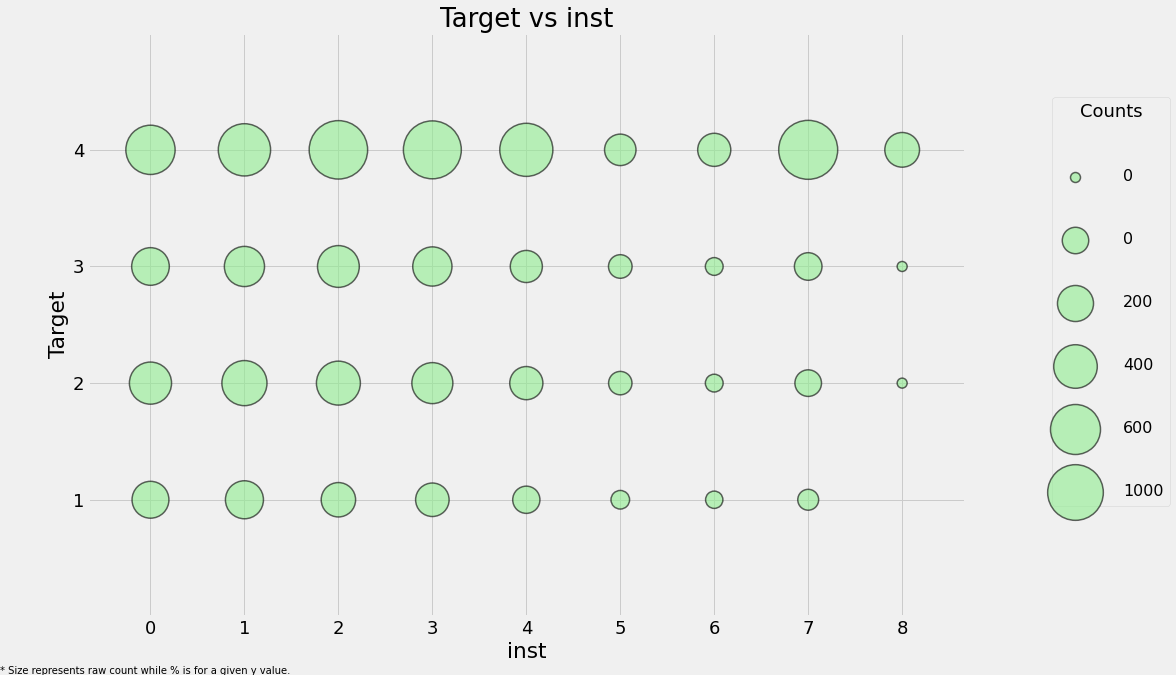

In [114]:
plot_categoricals('inst', 'Target', ind, annotate=False)

Text(0.5, 1.0, 'education distribution by target')

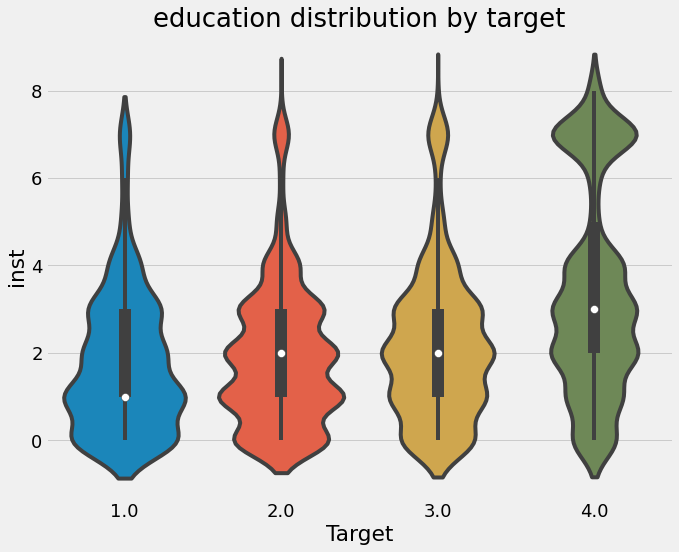

In [115]:
# 타겟별 교육 수준 분포 - violinplot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Target', y='inst', data=ind)
plt.title('education distribution by target')

In [116]:
# instlevel 피처들 제거
ind = ind.drop(columns=[c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 31)

#### 7.6.3. Feature Construction
##### 7.6.3.1. escolari/age feature
학교 재학 기간에 나이를 나누어 새로운 피처인 `escolari/age`를 생성했다. 

In [118]:
# 학교 재학 기간에 나이를 나눈 escolari/age 피처 생성
ind['escolari/age'] = ind['escolari'] / ind['age']
ind['escolari/age'].head()

0    0.232558
1    0.179104
2    0.119565
3    0.529412
4    0.297297
Name: escolari/age, dtype: float64

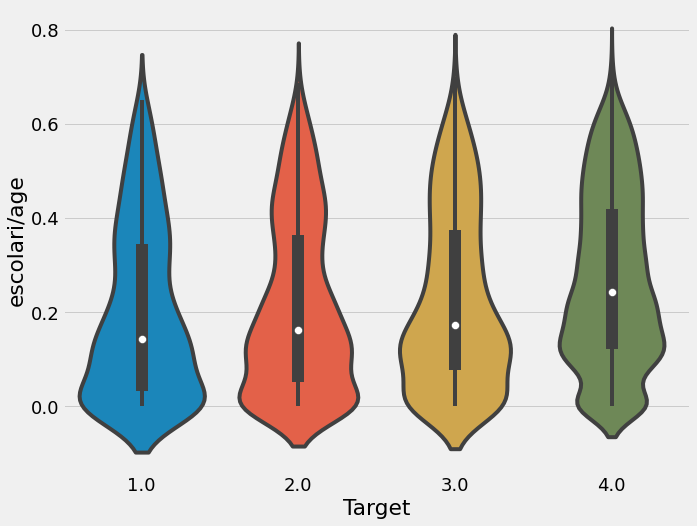

In [119]:
plt.figure(figsize=(10, 8))
sns.violinplot('Target', 'escolari/age', data=ind)

##### 7.6.3.2. inst/age feature
교육 수준을 나타내는 `inst`피처에 나이를 나누어 `inst/age`라는 새로운 피처를 생성했다.

In [120]:
# 교육수준에 나이를 나눈 inst/age 피처 생성
ind['inst/age'] = ind['inst'] / ind['age']
ind['inst/age'].head()

0    0.069767
1    0.104478
2    0.043478
3    0.176471
4    0.108108
Name: inst/age, dtype: float64

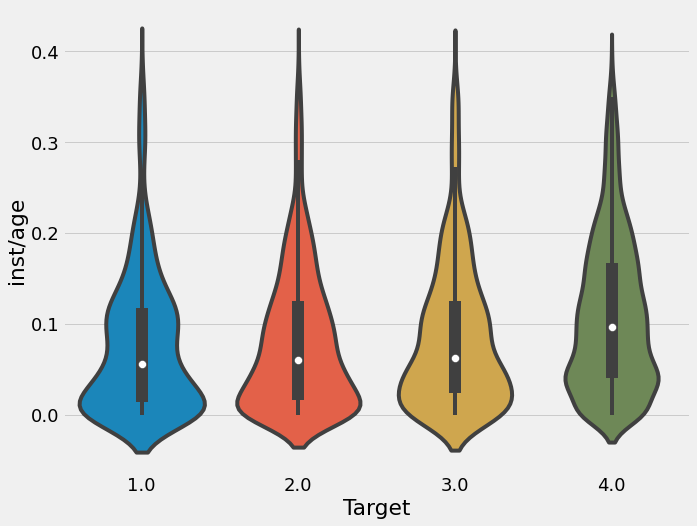

In [123]:
plt.figure(figsize=(10, 8))
sns.violinplot('Target', 'inst/age', data=ind)

##### 7.6.3.3. tech feature
마지막으로 태블릿과 핸드폰 개수의 합을 나타내는 `tech` 피처를 생성했다.

In [125]:
# 태블릿과 핸드폰 개수의 합을 나타내는 tech 피처 생성
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].value_counts()

1    24721
2     7936
0      756
Name: tech, dtype: int64

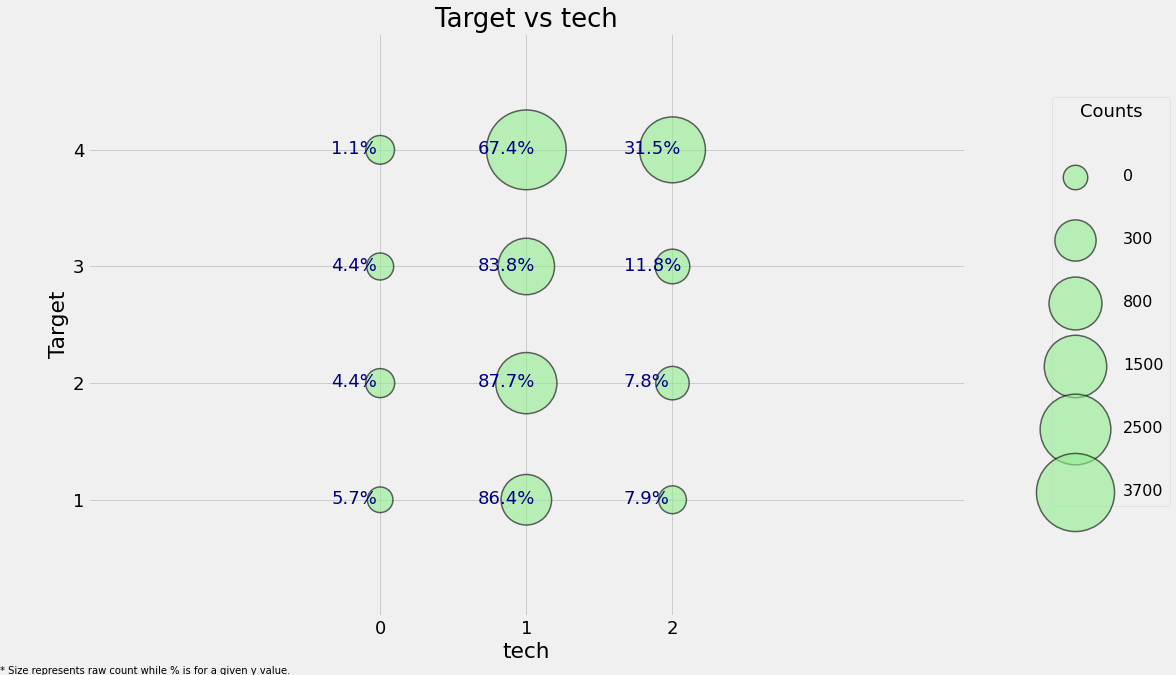

In [126]:
plot_categoricals('tech', 'Target', ind)

### 7.7. Feature Engineering thorugh Aggregations
개인 수준의 데이터를 가구 수준의 데이터로 변환하기 위해서 각 가구 별로 개인 수준의 피처의 값을 통합할 필요가 있다. 가장 간단한 방법은 **가구별 ID로 그룹화하여 집계 함수(Aggregation Function)을 사용하는 것**이다. 

이렇게 통합하고 난 뒤 다시 중복되는 즉, 상관관계가 높은 컬럼들을 제거할 것이다.

In [127]:
# 최대와 최소의 차이
def range_(x): 
    return x.max() - x.min()
# range_함수 이름 지정 
range_.__name__ = 'range_'

In [128]:
# 집계 함수로 개인 데이터를 통합
ind_agg = ind.drop(columns='Target').groupby('idhogar').agg(
    ['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

In [129]:
# 집계 함수로 만들어진 피처를 새로운 피처로 변환
new_cols = []

for col in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_cols.append(f'{col}-{stat}')

In [130]:
ind_agg.columns = new_cols
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [131]:
ind_agg.shape

(10340, 180)

#### 7.7.1. Feature Selection
특징 선택(Feature Selection)의 첫 번째 단계로 **0.95보다 큰 상관관계를 가진 변수** 쌍 중 하나를 제거해주자.

In [132]:
# 상관관계 행렬 생성
corr_matrix = ind_agg.corr()
# 위쪽 삼각형 부분만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# 상관관계가 높은 피처 추출
to_drop = [col for col in upper.columns if any(abs(upper[col]) > 0.95)]

print('상관관계가 0.95를 넘는 피처의 개수 :', len(to_drop))

상관관계가 0.95를 넘는 피처의 개수 : 85


In [133]:
# 상관관계가 높은 피처들 제거
ind_agg = ind_agg.drop(columns=to_drop)
ind_agg.shape

(10340, 95)

#### 7.7.2. Final DataFrame
이렇게 하면 개인 수준의 변수가 가구 수준의 변수로 성공적으로 변환되었다! 이제 모델에 넣을 수 있는 최종 데이터프레임을 생성하자.

In [134]:
final = heads.merge(ind_agg, on='idhogar', how='left')
print('최종 데이터프레임 크기 :', final.shape)
final.head()

최종 데이터프레임 크기 : (10307, 190)


Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  sanitario1  sanitario2  \
0                1               0            0           0           1   
1                1               0            0           0           1   
2                1               0            0           0           1   
3                1               0            0           0           1   
4                1               0            0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              0   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0          0          0   
4              1              0          1          0          0          0   

   elimbasu5  elimbasu6  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0          0          0          0          0          1          0   
1          0          0          0          0          1          0   
2          0          0          1          0          0          0   
3          0          0          0          0          1          0   
4          0          0          0          0          1          0   

   tipovivi5  computer  television  lugar1  lugar2  lugar3  lugar4  lugar5  \
0          0         0           0       1       0       0       0       0   
1          0         0           0       1       0       0       0       0   
2          0         0           0       1       0       0       0       0   
3          0         0           0       1       0       0       0   

#### 7.7.3. Final Data Exploration
최종적으로 만들어진 `final` 데이터프레임을 가지고 EDA를 해보자.

In [137]:
# 타겟과의 상관관게 행렬 생성
corrs = final.corr()['Target']

In [138]:
# 양의 상관관계
corrs.sort_values().head()

warning            -0.301791
hogar_nin          -0.266309
r4t1               -0.260917
estadocivil1-sum   -0.239130
overcrowding       -0.234954
Name: Target, dtype: float64

In [139]:
# 음의 상관관계
corrs.sort_values().dropna().tail()

wall+roof+floor    0.332446
meaneduc           0.333652
inst-max           0.368229
escolari-max       0.373091
Target             1.000000
Name: Target, dtype: float64

`final` 데이터프레임의 피처 중 타겟과 **높은 상관관계**를 보이는 변수를 탐구해보자.

##### 7.7.3.1. escolari-max feature

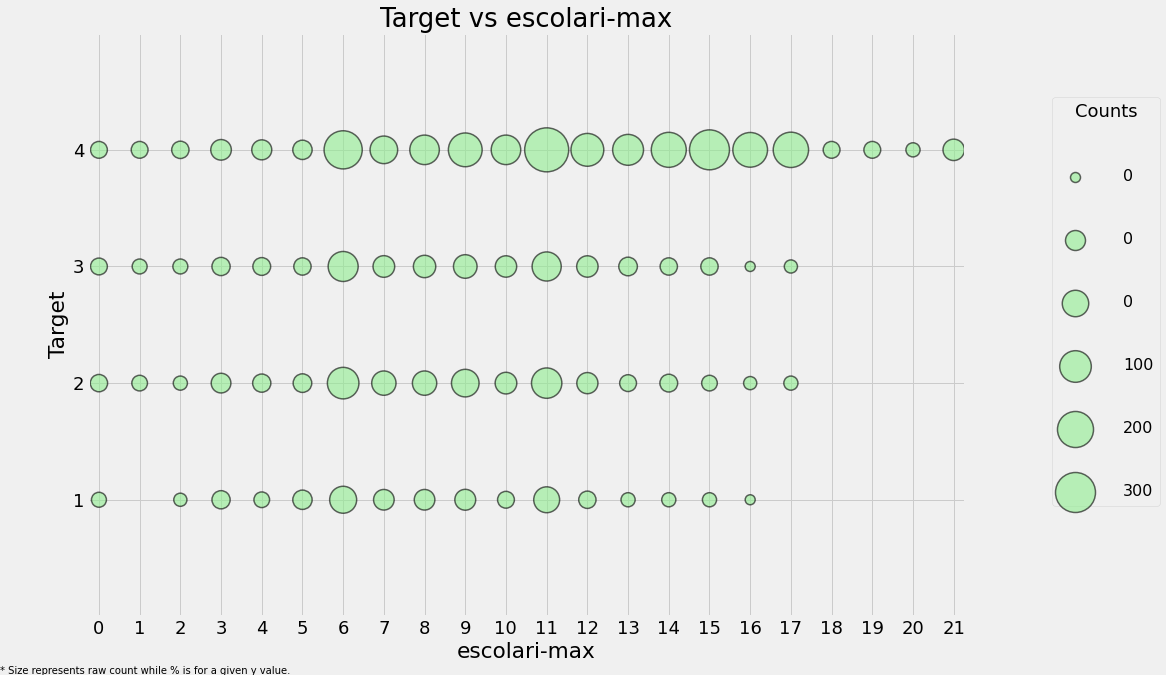

In [140]:
plot_categoricals('escolari-max', 'Target', final, annotate=False)

Text(0.5, 1.0, 'max schooling by target')

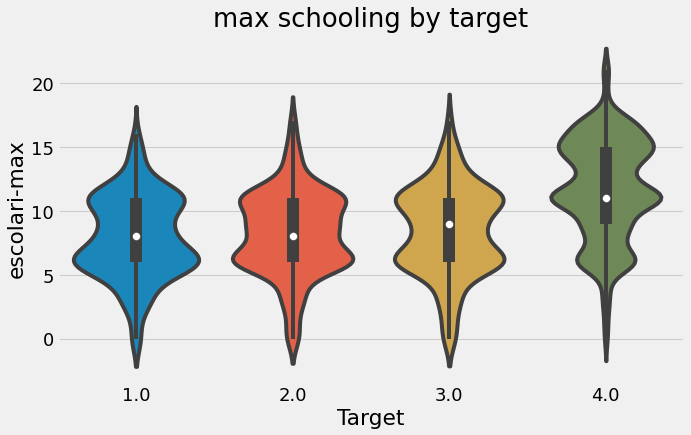

In [141]:
# 타겟값에 따른 escolari-max의 분포 - violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='escolari-max', data=final)
plt.title('max schooling by target')

Text(0.5, 1.0, 'max schooling by target')

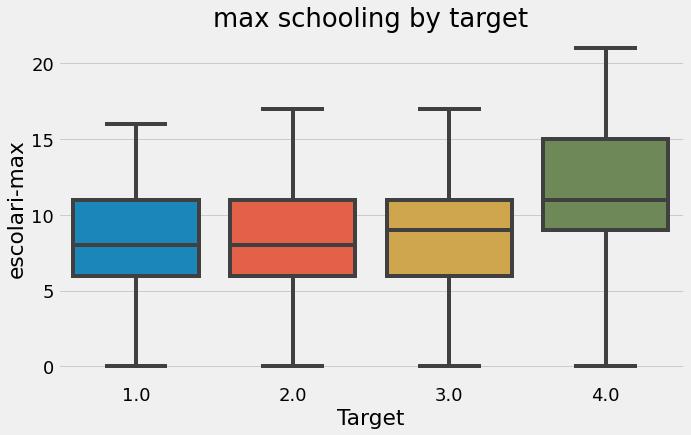

In [142]:
# 타겟값에 따른 escolari-max의 분포 - boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='escolari-max', data=final)
plt.title('max schooling by target')

**가구의 최대 교육 수준이 높을수록 덜 빈곤하다**는 것을 알 수 있다. 라벨 4 뿐만 아니라 라벨 3의 경우 중간값이 1과 2에 비해 높은 것을 볼 수 있다.

##### 7.7.3.2. meaneduc feature

Text(0.5, 1.0, 'average schooling by target')

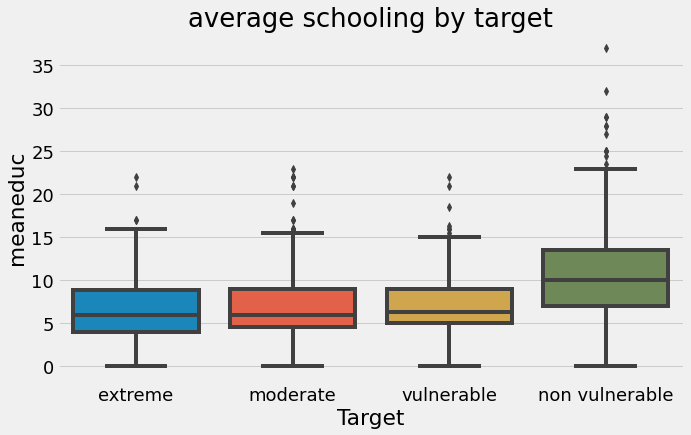

In [143]:
# 타겟값에 따른 meaneduc의 분포 - boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('average schooling by target')

비슷하게 **가구의 평균 교육 수준이 높을수록 덜 빈곤하다**는 것을 볼 수 있다.

##### 7.7.3.3. overcrowding feature
`overcrowding`은 **방 하나당 몇 명의 사람이 이용하는지**를 나타낸다.

Text(0.5, 1.0, 'overcrowding by target')

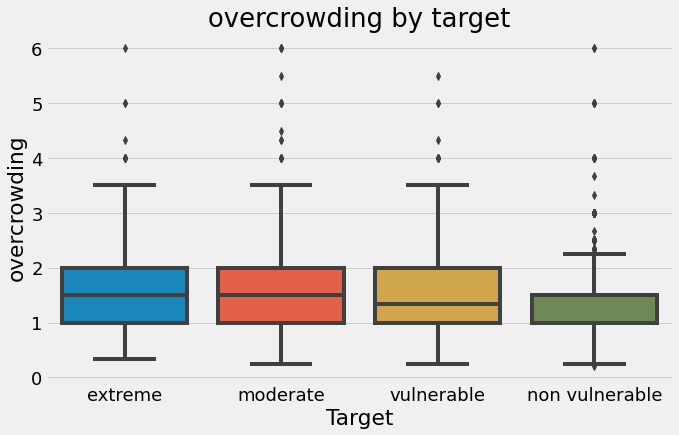

In [144]:
# 타겟 별 overcrowding의 분포 - boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='overcrowding', data=final)
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('overcrowding by target')

**방 1개당 이용자가 적을 수록 덜 빈곤하다**는 것을 알 수 있다.

##### 7.7.3.4. female-head
가장의 성별에 따라 타겟 값이 어떻게 분포하는지 살펴보자.

In [145]:
# 가장 데이터만 추출
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
# 최종 데이터프레임과 병합
final = final.merge(head_gender, on='idhogar', how='left').rename(
    columns={'female': 'female-head'})

In [146]:
# 가장의 성별에 따른 타겟 값의 분포
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

라벨 4의 비율로 보아 **가장이 여성인 경우 아조 조금 빈곤 정도가 높은 것**으로 보인다.

Text(0.5, 1.0, 'target by female head of household')

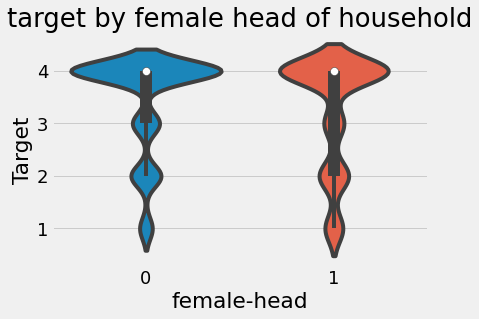

In [147]:
# 타겟 값에 다른 가장의 성별 분포 - violinplot
sns.violinplot(x='female-head', y='Target', data=final)
plt.title('target by female head of household')

Text(0.5, 1.0, 'average education by target and female head of household')

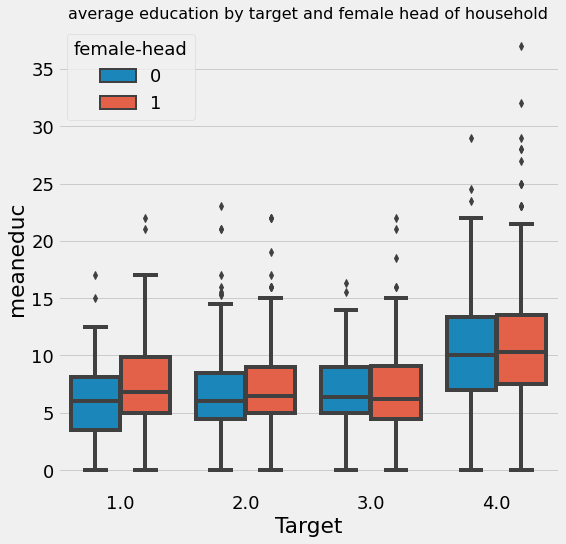

In [148]:
# 타겟 값별 교육수준과 가장의 성별 분포
plt.figure(figsize=(8, 8))
sns.boxplot(x='Target', y='meaneduc', hue='female-head', data=final)
plt.title('average education by target and female head of household', size=16)

In [149]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

타겟 값에 무관하게 **가장이 여성인 경우 조금 더 높은 교육 수준을 가지고 있는 것**처럼 보인다.

## 8. Machine Learning Modeling
* `RandomForestClassifier`를 베이스 모델로 삼는다.
* 후에 `GradientBoosting` 모델을 통해 성능을 개선한다.
* 10번에 걸쳐 10겹(fold)으로 나눠진 데이터 별로 학습과 검증을 진행한다.
* 모델 성능 평가지표로는 **Macro F1 스코어**를 사용한다.

### 8.1. RandomForest Baseline

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# 교차 Macro F1 스코어
scorer = make_scorer(f1_score, greater_is_better=True, average='macro')

In [151]:
# 학습 데이터의 라벨 분리
train_labels = np.array(list(final.loc[final['Target'].notnull(), 'Target'].astype(np.uint8)))
# 학습 및 테스트 데이터로 분리
train_set = final[final['Target'].notnull()].drop(columns=['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns=['Id', 'idhogar', 'Target'])
# 최종 제출 포맷 생성
submission_base = test[['Id', 'idhogar']].copy()

다른 모델은 괜찮지만 거리와 관련된 KNN이나 SVM과 같은 머신러닝 모델의 경우 피처 값의 스케일링(Scaling)을 꼭 해줘야 한다. 

거기에 Imputation을 통해 결측치를 채워줄 것인데, 이를 `pipeline`을 사용하면 손쉽게 처리할 수 있다.

In [152]:
# 피처명 추출
features = list(train_set.columns)
# 스케일링과 Imputing 파이프라인 생성
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

# 학습 및 테스트 데이터에 적용
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [153]:
# 랜덤포레스트 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1)

# 10겹 교차 검증
cv_score = cross_val_score(
    model, train_set, train_labels, cv=10, scoring=scorer)

print('10겹 교차검증의 F1 스코어 : {} (표준편차 {})'.format(
    round(cv_score.mean(), 4), round(cv_score.std(), 4)))

10겹 교차검증의 F1 스코어 : 0.3493 (표준편차 0.0493)


랜덤 포레스트 모델의 성능이 그닥 좋지 않은 것을 볼 수 있다. 일단 개선할 여지를 남겨두고 다음 단계로 이동하자.

### 8.2. Feature Importances
트리 기반 모델의 경우 **모델이 어떤 피처를 중요하게 생각했는지**를 볼 수 있다. 모델을 학습시킨 후에 `feature_importacnes_`로 해당 수치를 확인할 수 있다. 다만 특성 중요도는 피처가 어느 방향으로 중요한지 이야기해주지는 않는다. 즉, 양의 방향으로 혹은 음의 방향으로 중요한지 알 수가 없다.

In [155]:
# 모델 학습
model.fit(train_set, train_labels)

# 특성 중요도 데이터프레임
feature_importances = pd.DataFrame({'feature':features, 'importance':model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000793
1       hacapo    0.000479
2         v14a    0.000403
3       refrig    0.001412
4  paredblolad    0.006185

아래는 **특성 중요도를 시각화하는 함수**이다.

In [156]:
# 특성 중요도를 시각화하는 함수
def plot_feature_importances(df, n=10, threshold=None):
    '''
    n개의 특성 중요도가 높은 피처들을 그린다. 만약 threshold가 명시되어 있다면 누적 중요도를 그리고 
    threshold 값에 닿을 때까지 필요한 피처들의 개수를 출력한다.
    트리 기반 특성 중요도를 가지고 사용하도록 설계되었다.

    PARAMETERS:
        - df (dataFrame) : 특성 중요도 데이터프레임. 컬럼은 "feature"와 "importance"여야 함.
        - n (int) : 그릴 가장 중요한 특성의 개수. 기본값은 15.
        - threshold (float) : 누적 중요도 그래프에서의 임계값. 기본 값은 None.

    RETURNS:
        - df (dataFrame) : 정규화된 특성 중요도를 기준으로 정렬된 데이터프레임과 누적 중요도 컬럼

    NOTE:
        - 여기서의 정규화는 합이 1임을 뜻한다.
        - 누적 중요도는 가장 중요한 피처부터 가장 중요하지 않은 피처까지 합산하여 계산된다.
        - 임계값 0.9는 누적 중요도의 90%를 도달하는 데 필요한 가장 중요한 피처를 나타낸다.
    '''

    plt.style.use('fivethirtyeight')

    # 특성 중요도를 기준으로 피처 정렬
    df = df.sort_values('importance', ascending=False).reset_index(drop=True)

    # 합이 1이 되도록 특성 중요도를 정규화
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    # 누적 중요도를 계산
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    plt.rcParams['font.size'] = 12

    # n개의 가장 중요한 피처 시각화 - barplot
    df.loc[:n, :].plot.barh(y='importance_normalized',
                            x='feature', color='darkgreen',
                            edgecolor='k', figsize=(12, 8),
                            legend=False, linewidth=2)
    plt.xlabel('normalized importance', size=18)
    plt.ylabel('')
    plt.title(f'{n} most important features', size=18)
    plt.gca().invert_yaxis()

    # threshold값이 있는 경우
    # 누적 중요도 그래프를 그림
    if threshold:
        # 누적 중요도 그래프
        plt.figure(figsize=(8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('number of features', size=16)
        plt.ylabel('cumulatvie importance', size=16)
        plt.title('cumulative feature importance', size=18)

        # 입계값을 넘기는 데 필요한 피처의 개수
        # 개수가 아니라 인덱스(실제 값을 없기 위해 1을 더할 필요가 있음)
        importance_index = np.min(
            np.where(df['cumulative_importance'] > threshold))

        # 수직선을 추가
        plt.vlines(importance_index+1, ymin=0, ymax=1.05,
                   linestyles='--', color='red')
        plt.show()

        print('누적 중요도의 {:.0f}%를 넘기기 위해 {}개의 피처가 필요하다'.format(
            100*threshold, importance_index+1))
        
    return df

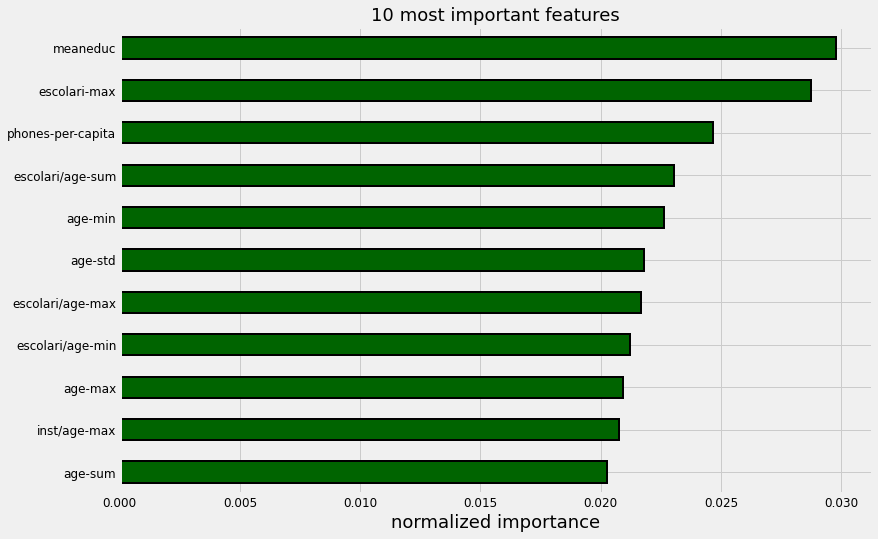

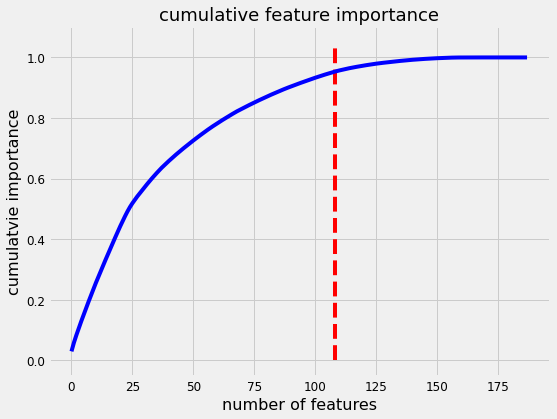

누적 중요도의 95%를 넘기기 위해 108개의 피처가 필요하다


In [157]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

특성 중요도가 가장 높은 값으로 `meanedu`와 `escolari-max`가 1, 2위를 차지한 것을 볼 수 있다. 이를 보아 **교육 수준**은 정말 가구의 빈곤 상태와 큰 연관이 있음을 보여준다. 하지만 이 두 변수는 높은 상관관계를 보여줄 수 있으므로 의심을 해봐야한다. 다른 가장 중요한 피처들은 우리가 만들었던 혹은 이미 존재했던 피처들이다.

In [158]:
# 타겟값에 따른 피처의 분포 - kdeplot
def kde_target(df, variable):
    df = df[df['Target'].notnull()]
    colors = {1:'red', 2:'orange', 3:'blue', 4:'green'}
    
    plt.figure(figsize=(12, 8))
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(),
                   label=f'Poverty Level: {level}',
                   color=colors[int(subset['Target'].unique())])
    plt.xlabel(variable)
    plt.ylabel('density')
    plt.title('{} distribution'.format(variable.capitalize()))

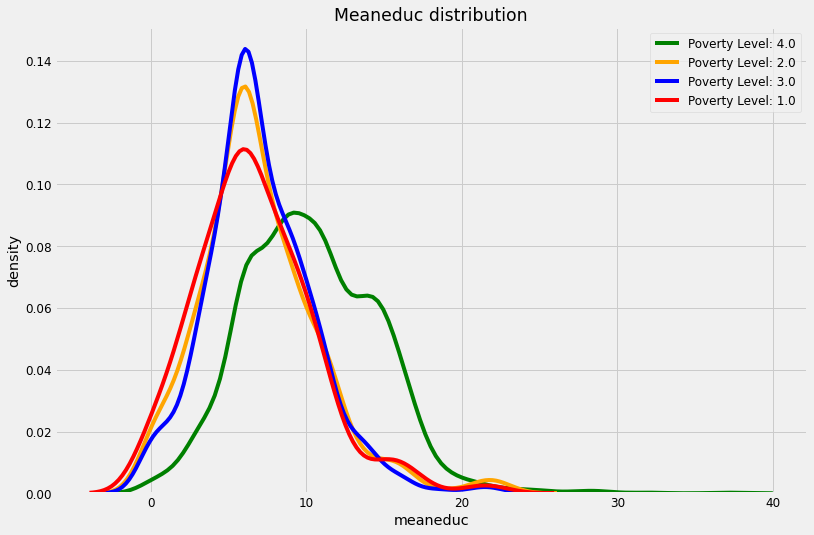

In [159]:
kde_target(final, 'meaneduc')

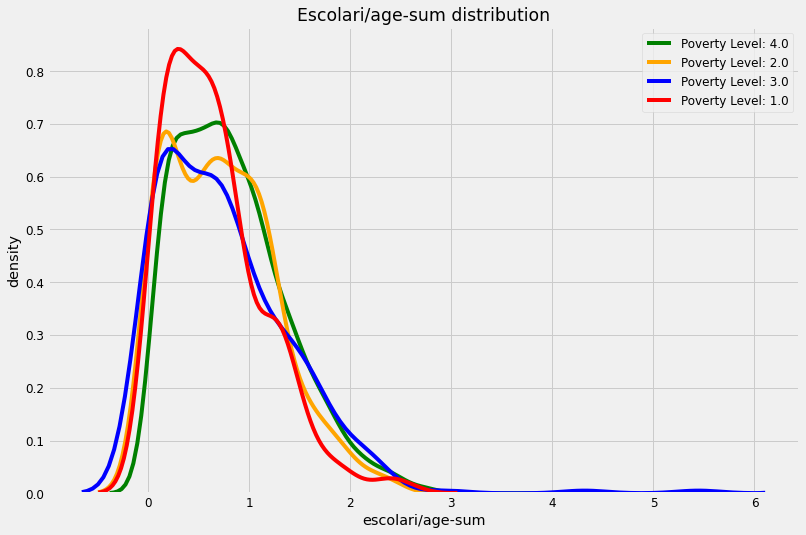

In [161]:
kde_target(final, 'escolari/age-sum')

## 9. Model Selection
어떤 모델이 최적인지 알기 위해서는 여러 가지 모델들을 다 시도해봐야 한다. 대부분의 캐글러들은 **Gradient Boosting** 모델을 사용하지만 다른 모델들도 살펴보자.

각 모델의 성능을 비교하기위해 모델 성능을 저장하는 데이터 프레임을 만들어 모델의 성능을 기록할 것이다.

In [162]:
# 사용할 모델 import
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [163]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# 경고 필터링
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# 결과를 저장할 데이터프레임: 모델명, 스코어 평균, 스코어 표준편차
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

In [164]:
# 지정된 모델로 10겹 교차검증을 실시
def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(
        model, train, train_labels, cv=10, scoring=scorer, n_jobs=-1)
    print(
        f'10겹 교차검증 CV 점수: {round(cv_scores.mean(), 5)} (표준편차 {round(cv_scores.std(), 5)})')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                           'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)
    return model_results

### 9.1. LinearSVC

In [165]:
model_results = cv_model(train_set, train_labels,
                         LinearSVC(), 'LSVC', model_results)

10겹 교차검증 CV 점수: 0.27758 (표준편차 0.04254)


랜덤 포레스트의 성능보다 더 떨어진다. 하지만 아직 하이퍼파라미터 튜닝을 하지 않았으므로 실제 성능은 더 개선될 수 있다.

### 9.2. GaussianNB

In [166]:
model_results = cv_model(train_set, train_labels,
                         GaussianNB(), 'GNB', model_results)

10겹 교차검증 CV 점수: 0.18958 (표준편차 0.04294)


가우시안 나이브 베이즈 모델의 성능은 굉장히 형편 없다.

### 9.3. Multi-layer Perceptron

In [167]:
model_results = cv_model(train_set, train_labels, MLPClassifier(
    hidden_layer_sizes=(32, 64, 128, 64, 32)), 'MLP', model_results)

10겹 교차검증 CV 점수: 0.29079 (표준편차 0.05264)


랜덤 포레스트보다는 떨어지지만 꽤 좋은 성능을 보여준다. 하지만 다층 신경망의 경우 데이터가 적을수록 오버피팅될 경향이 높다.

### 9.4. Linear Discriminant Analysis

In [168]:
model_results = cv_model(train_set, train_labels,
                         LinearDiscriminantAnalysis(),
                         'LDA', model_results)

10겹 교차검증 CV 점수: 0.31184 (표준편차 0.05927)


경고창을 필터링하지 않는다면 "변수가 공선성(collinearity)이 있습니다"라는 경고메시지를 보게 될 것이다. 랜덤 포레스트 만큼 성능이 나오기 때문에 공선성 문제를 해결하고 이 모델을 다시 시도해보는 게 좋을 것이다.

### 9.5. Ridge

In [169]:
model_results = cv_model(train_set, train_labels,
                         RidgeClassifierCV(), 'RIDGE', model_results)

10겹 교차검증 CV 점수: 0.27858 (표준편차 0.03135)


### 9.6. KNN Neighbors

In [170]:
# neighbors의 개수에 따라 점수를 달리함
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels,
                            KNeighborsClassifier(n_neighbors=n),
                            f'knn={n}', model_results)


KNN with 5 neighbors

10겹 교차검증 CV 점수: 0.31844 (표준편차 0.02311)

KNN with 10 neighbors

10겹 교차검증 CV 점수: 0.29539 (표준편차 0.03998)

KNN with 20 neighbors

10겹 교차검증 CV 점수: 0.27013 (표준편차 0.02263)


### 9.7. Extra Trees
결정 트리에 앙상블을 이용한 랜덤포레스트의 변형 모델이다.

In [171]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators=100, random_state=10),
                         'EXT', model_results)

10겹 교차검증 CV 점수: 0.32199 (표준편차 0.04616)


### 9.8. Random Forest

In [172]:
model_results = cv_model(train_set, train_labels,
                        RandomForestClassifier(n_estimators=100, random_state=10),
                        'RF', model_results)

10겹 교차검증 CV 점수: 0.34933 (표준편차 0.04931)


### 9.9. Comparing Model Performance

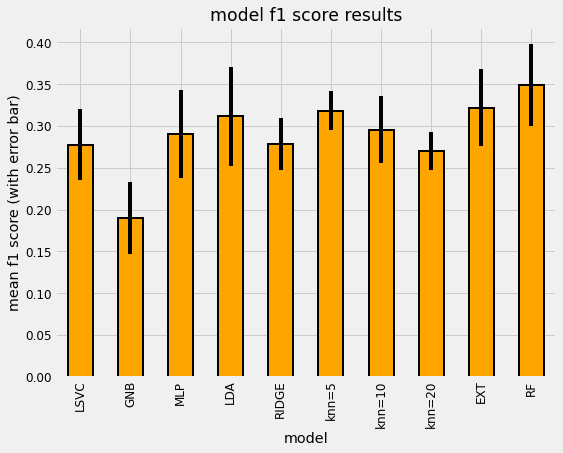

In [173]:
model_results.set_index('model', inplace=True)

# cv_mean을 기준으로 모델 성능 시각화 - barplo
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                 yerr=list(model_results['cv_std']),
                                 edgecolor='k', linewidth=2)
plt.title('model f1 score results')
plt.ylabel('mean f1 score (with error bar)')
model_results.reset_index(inplace=True)

아마 이 그래프를 본다면 랜덤포레스트가 최고의 모델이라고 생각할 수 있을 것이다. 하지만 우리는 아직 어떤 하이퍼파라미터 튜닝도 하지 않았기 때문에 튜닝한 뒤의 모델 성능은 달라질 수 있다.

다음은 사이킷런의 디폴트 값으로 학습시켰을 때와 하이퍼파라미터 튜닝을 했을 때를 비교한 표이다. 이 표를 따르면 대부분의 경우 정확도를 최대 10퍼센트까지 상승시킬 수 있다.

![hyperparameter_improvement](../img/hyperparameter_improvement.png)

## 10. Make Submission

In [175]:
# 테스트 데이터의 id값 추출
test_ids = list(final.loc[final['Target'].isnull(), 'idhogar'])
test_ids[:10]

['72958b30c',
 '5b598fbc9',
 '1e2fc704e',
 '8ee7365a8',
 'ff69a6fc8',
 'b61e2bb92',
 'a499b6c30',
 'f751b9e44',
 'ba1262b51',
 'd5a0a19d8']

다음의 함수는 모델, 학습 데이터, 라벨 그리고 테스트 데이터을 사용하여 다음과 같은 작업을 수행한다.

* `fit`으로 학습 데이터로 모델 학습
* `predict`으로 테스트 데이터로 예측
* 저장하고 대회에 올릴 제출 데이터프레임 생성

In [176]:
def submit(model, train, train_labels, test, test_ids):
    # 모델 학습
    model.fit(train, train_labels)
    # 모델 예측
    predictions = model.predict(test)
    predictions = pd.DataFrame({'idhogar':test_ids, 'Target':predictions})
    
    # 제출 데이터프레임 생성
    submission = submission_base.merge(predictions,
                                      on='idhogar',
                                      how='left').drop(columns=['idhogar'])
    
    # 가장이 없는 가구의 target값 채우기
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    return submission

시험 삼아 랜덤 포레스트의 제출 파일을 생성해보자.

In [177]:
rf_submission = submit(RandomForestClassifier(n_estimators=100, random_state=10, n_jobs=-1),
                      train_set, train_labels,
                      test_set, test_ids)
rf_submission.to_csv('../data/rf_submission_2.csv', index=False)

제출 시 **0.370**의 점수를 획득할 수 있다.

## 11. Feature Selection
모델의 성능을 올릴 수 있는 방법 중 하나는 **특징 선택(Feature Selection)**이다. 이 과정을 거치고 나면 유의미한 컬럼들만 남길 수 있다. 그리고 그 과정은 다음과 같다.
* 0.95이상의 상관 계수를 갖는 컬럼 제거
* 재귀적 피처 제거 방법(Recursive Feature Elimination)을 이용해서 제거

### 11.1. Eliminate High Correlation Variables

In [178]:
train_set = pd.DataFrame(train_set, columns=features)

# 상관계수 행렬 생성
corr_matrix = train_set.corr()
# 위쪽 삼각형만 추출
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# 상관관계가 높은 피처 추출
to_drop = [column for column in upper.columns if any(abs(upper[column]) >0.95)]
to_drop

['v18q-count', 'female-sum']

In [179]:
# 상관관계가 높은 피처 제거
train_set = train_set.drop(columns=to_drop)
train_set.shape

(2973, 186)

In [180]:
# 학습 데이터와 테스트 데이터의 공통 피처만 남김
test_set = pd.DataFrame(test_set, columns=features)
train_set, test_set = train_set.align(test_set, axis=1, join='inner')

In [183]:
features = list(train_set.columns)
len(features)

186

### 11.2. Recursive Feature Elimination with Random Forest
RFECV는 교차 검증을 이용해 반복적으로 피처를 제거하는 방법이다. 

* `selector`가 매 이터레이션마다 모델의 특징 중요도를 계산한다.
* 매 이터레이션마다 특징의 부분을 제거하거나 특징의 개수를 점차 줄여간다.
* 이 과정은 더이상 교차 검증 점수가 향상되지 않을 때가지 진행한다.

In [184]:
from sklearn.feature_selection import RFECV

# 특성 선택을 위한 모델 생성
estimator = RandomForestClassifier(random_state=10, n_estimators=100, n_jobs=-1)

# RFECV 인스턴스 생성
selector = RFECV(estimator, step=1, cv=3, scoring=scorer, n_jobs=-1)

In [185]:
# RFECV 진행
selector.fit(train_set, train_labels)

RFECV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
      n_jobs=-1, scoring=make_scorer(f1_score, average=macro))

74

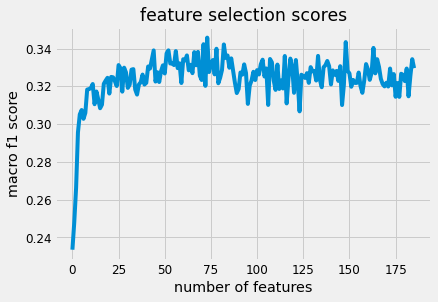

In [186]:
# 매 이터레이션 별 cv 스코어
plt.plot(selector.grid_scores_)
plt.xlabel('number of features')
plt.ylabel('macro f1 score')
plt.title('feature selection scores')

# cv 스코어가 최대일 때의 피처 개수
selector.n_features_

피처의 개수가 96개만 되어도 점수가 향상되는 것을 볼 수 있다. 각 컬의 랭킹을 `selector` 객체에서 추출하여 `rank==1`인 컬럼들만 사용하자.

In [187]:
rankings = pd.DataFrame({'feature': list(train_set.columns), 'rank': list(
    selector.ranking_)}).sort_values(by='rank')
rankings.head(10)

feature  rank
101        female-std     1
54              area1     1
83               roof     1
84              floor     1
85    wall+roof+floor     1
105  estadocivil1-sum     1
86            warning     1
48             lugar1     1
87              bonus     1
121  estadocivil7-sum     1

### 11.3. Selected Dataset
마지막으로 선택된 피처들로만 구성된 데이터셋을 생성한다.

In [188]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [189]:
# 데이터프레임으로 변환
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns=selected_features)
test_selected = pd.DataFrame(test_selected, columns=selected_features)

선택된 피처들을 랜덤 포레스트 모델에 넣었을 때의 성능은 다음과 같다. **전체 피처를 사용하는 것보다는 선택된 피처를 사용했을 때 조금 더 성능이 향상된 것**을 볼 수 있다.

In [190]:
# 선택된 피처로 랜덤 포레스트 모델 교차 검증
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10겹 교차검증 CV 점수: 0.35686 (표준편차 0.04439)


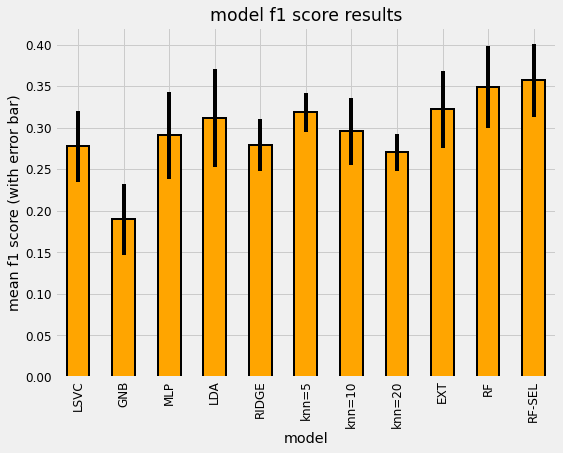

In [191]:
# 다시 모델 성능 시각화 - barplot
model_results.set_index('model', inplace=True)
model_results['cv_mean'].plot.bar(color='orange', figsize=(8, 6),
                                 yerr=list(model_results['cv_std']),
                                 edgecolor='k', linewidth=2)
plt.title('model f1 score results')
plt.ylabel('mean f1 score (with error bar)')
model_results.reset_index(inplace=True)

## 12. Upgrade Our Model: Gradient Boosting Model
많은 캐글 대회에서 GBM 모델이 우승을 한 것을 볼 수 있다. GBM 모델로는 XGBoost, CatBoost 등 다양하지만 그 중 **LightGBM**을 사용하여 학습해보자.

추가로 early-stopping 설정을 하여 `n_estimators`의 수를 유동적으로 조절하고 5겹 교차 검증을 시도할 것이다. 즉, Macro F1 스코어가몇 번의 반복시행을 하는 데 점수가 증가하지 않으면 다시 반복한다는 뜻이다. 이를 위해 자체 지표(custom metric)을 아래 정의하였다.

In [192]:
def macro_f1_score(labels, predictions):
    # 원-핫 인코딩처럼 한다는 이야기
    # 최종 결과값은 최고 인덱스 값을 뽑을 예정 
    predictions = predictions.reshape(len(np.unique(labels)), -1).argmax(axis=0)
    
    metric_value = f1_score(labels, predictions, average='macro')
    
    return 'macro_f1', metric_value, True

## 13. Light Gradient Boosting

In [193]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from IPython.display import display

In [194]:
def model_gbm(features, labels, test_features, test_ids, nfolds=5, return_preds=False, hyp=None):
    feature_names = list(features.columns)

    # 하이퍼파라미터 옵션
    if hyp is not None:
        # early-stopping을 설정하므로 estimators의 개수 불필요
        if 'n_estimators' in hyp:
            del hyp['n_estimators']
        params = hyp
    else:
        # 모델의 하이퍼파라미터
        params = {
            'boosting_type': 'dart',
            'colsample_bytree': 0.88,
            'learning_rate': 0.028,
            'min_child_samples': 10,
            'num_leaves': 36,
            'reg_alpha': 0.76,
            'reg_lambda': 0.43,
            'subsample_for_bin': 40000,
            'subsample': 0.54,
            'class_wieght': 'balanced'
        }

    # 모델 설계
    model = lgb.LGBMClassifier(**params, objective='multiclass',
                               n_jobs=-1, n_estimators=10000, random_state=10)

    # 분포가 일정한(stratified) K겹 교차검증 사용
    strkfold = StratifiedKFold(n_splits=nfolds, shuffle=True)

    # 각 폴드별 모든 예측 저장할 데이터프레임
    predictions = pd.DataFrame()
    importances = np.zeros(len(feature_names))

    # 인덱싱을 위해 np.array로 변환
    features = np.array(features)
    test_features = np.array(test_features)
    labels = np.array(labels).reshape((-1))

    # 검증 시의 score를 저장할 리스트
    valid_scores = []

    # 각 폴드별 교차검증
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        # 폴드별 예측 데이터브레임
        fold_predictions = pd.DataFrame()

        # 학습 및 검증 데이터셋
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]

        # early-stopping 상태로 학습
        model.fit(X_train, y_train, early_stopping_rounds=100,
                  eval_metric=macro_f1_score,
                  eval_set=[(X_train, y_train), (X_valid, y_valid)],
                  eval_names=['train', 'valid'],
                  verbose=200)

        # 해당 폴드의 검증 데이터셋의 score 기록
        valid_scores.append(model.best_score_['valid']['macro_f1'])

        # 해당 폴드의 확률로 모델 예측
        fold_probabilities = model.predict_proba(test_features)

        # 각 라벨을 컬럼으로 나누어 예측값을 기록
        for j in range(4):
            fold_predictions[j+1] = fold_probabilities[:, j]

        # 예측을 위해 필요한 정보 추가
        fold_predictions['idhogar'] = test_ids
        fold_predictions['fold'] = i+1
        
        # 새로운 예측 기록
        predictions = predictions.append(fold_predictions)
        
        # 특성 중요도
        # 왜 폴드 수를 나눌까?
        importances += model.feature_importances_ / nfolds

        # 폴드 정보를 출력
        display(
            f'Fold {i+1}, Validation Score: {round(valid_scores[i], 5)}, Estimators Trained: {model.best_iteration_}')

    # 특성 중요도 데이터프레임 생성
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    })

    valid_scores = np.array(valid_scores)
    display(f'{nfolds} cross validation score: {round(valid_scores.mean(), 5)} with std: {round(valid_scores.std(), 5)}.')

    # 예측을 살펴보고 싶다면
    # 폴드의 평균 값을 구하지 않는다
    if return_preds:
        predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
        predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
        return predictions, feature_importances

    # 폴드의 평균 예측값
    predictions = predictions.groupby('idhogar', as_index=False).mean()

    # 클래스 추출
    predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
    predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
    predictions = predictions.drop(columns=['fold'])

    # 각 개인에 대한 예측을 기준값과 병합
    submission = submission_base.merge(
        predictions[['idhogar', 'Target']], on='idhogar', how='left').drop(columns=['idhogar'])
    
    # 가장이 없는 개인에 대해서는 4로 Target 채움
    submission['Target'] = submission['Target'].fillna(4).astype(np.int8)
    
    # submission, 특성 중요도, 검증 score 반환
    return submission, feature_importances, valid_scores

### 13.1.Cross Validation with Early Stopping Notes
early-stopping을 적용하여 교차 검증을 하는 것은 **학습 데이터로의 오버피팅**을 막아준다. 모델을 오래 학습할수록 모델은 점점 더 복잡해지는 데 그 전에 미리 학습을 멈추기 때문에 오버피팅을 방지할 수 있다.

In [195]:
predictions, gbm_fi = model_gbm(train_set, train_labels, test_set, test_ids, return_preds=True)

[200]	train's multi_logloss: 0.719787	train's macro_f1: 0.724943	valid's multi_logloss: 0.918695	valid's macro_f1: 0.327204
[400]	train's multi_logloss: 0.56882	train's macro_f1: 0.822411	valid's multi_logloss: 0.876233	valid's macro_f1: 0.349289
[600]	train's multi_logloss: 0.429458	train's macro_f1: 0.875341	valid's multi_logloss: 0.86702	valid's macro_f1: 0.364978
[800]	train's multi_logloss: 0.338505	train's macro_f1: 0.934177	valid's multi_logloss: 0.871884	valid's macro_f1: 0.372137
[1000]	train's multi_logloss: 0.281849	train's macro_f1: 0.963095	valid's multi_logloss: 0.885778	valid's macro_f1: 0.370092
[1200]	train's multi_logloss: 0.229083	train's macro_f1: 0.980758	valid's multi_logloss: 0.901314	valid's macro_f1: 0.366629
[1400]	train's multi_logloss: 0.189774	train's macro_f1: 0.994579	valid's multi_logloss: 0.919621	valid's macro_f1: 0.351716
[1600]	train's multi_logloss: 0.156427	train's macro_f1: 0.998087	valid's multi_logloss: 0.945363	valid's macro_f1: 0.352589
[1800]

'Fold 1, Validation Score: 0.34688, Estimators Trained: 0'

[200]	train's multi_logloss: 0.720777	train's macro_f1: 0.72003	valid's multi_logloss: 0.918754	valid's macro_f1: 0.341685
[400]	train's multi_logloss: 0.57141	train's macro_f1: 0.808885	valid's multi_logloss: 0.868427	valid's macro_f1: 0.346003
[600]	train's multi_logloss: 0.429026	train's macro_f1: 0.879502	valid's multi_logloss: 0.844755	valid's macro_f1: 0.334652
[800]	train's multi_logloss: 0.340323	train's macro_f1: 0.938084	valid's multi_logloss: 0.843949	valid's macro_f1: 0.325306
[1000]	train's multi_logloss: 0.28535	train's macro_f1: 0.965568	valid's multi_logloss: 0.843981	valid's macro_f1: 0.36559


KeyboardInterrupt: 

In [ ]:
predictions.head()

참고로 `confidence`는 **신뢰 구간**을 나타낸다.

In [ ]:
plt.rcParams['font.size'] = 18

# 각 폴드와 Target별 신뢰구간(confidence) 분포 - kdeplot
g = sns.FacetGrid(predictions, row='fold', hue='Target', size=3, aspect=4)
g.map(sns.kdeplot, 'confidence')
g.add_legend()

plt.suptitle('distribution of confidence by fold and target', y=1.05)

In [ ]:
# 각 폴드와 Target별 신뢰구간(confidence) 분포 - violinplot
plt.figure(figsize=(24, 12))
sns.violinplot(x='Target', y='confidence', hue='fold', data=predictions)

그래프를 보아 타겟 값이 `4`일 때의 신뢰구간은 높은 것을 확인할 수 있다. 하지만 그 외이 타겟 값의 경우 신뢰구간이 상대적으로 많이 낮은 것을 확인할 수 있다. 이는 앞서 말했던 **클래스 불균형 문제**로 인해 발생한 것으로 보인다.

이제 가구별로 그룹화 하여 폴드별 스코어를 평균화하여 나타내준다.

In [ ]:
# 폴드의 예측값 평균 계산
predictions = predictions.groupby('idhogar', as_index=False).mean()
predictions

In [ ]:
# 각 가구의 타겟값 예측
predictions['Target'] = predictions[[1, 2, 3, 4]].idxmax(axis=1)
# 전체 폴드에서 최대 신뢰구간(confidence)
predictions['confidence'] = predictions[[1, 2, 3, 4]].max(axis=1)
predictions = predictions.drop(columns=['fold'])
predictions

마지막으로 그룹화한 뒤의 각 타겟값별 신뢰구간(confidence)를 살펴보자.

In [ ]:
# 각 Target 값별 신뢰구간 시각화 - boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='confidence', data=predictions)
plt.title('confidence by target')

In [ ]:
# 각 Target 값별 신뢰구간 시각화 - violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Target', y='confidence', data=predictions)
plt.title('confidence by target')

In [ ]:
# 제출 파일 생성
%%capture
submission, gbm_fi, valid_scores = model_gbm(train_set, train_labels,
                                            test_set, test_ids, return_preds=False)
submission.to_csv('../data/gbm_baseline_2.csv')

### 13.2. Try Selected Features

## 13. Model Optimization

## 14. Model Tuning with Hyperopt

## 15. Investigate Predictions

## 16. Dimension Reduction

## 17. Visualize Single Decision Tree

## 18. Conclusion